In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
 
dr_p = pd.read_csv("data/doctor_workplace.csv")
hos = pd.read_csv("data/hospital.csv", engine = "python")
mr = pd.read_csv("data/mr.csv")
mrkun = pd.read_csv("data/mrkun.csv")
sales = pd.read_csv("data/sales.csv")
speciality = pd.read_csv("data/specialty.csv")
hos_code = hos_code = pd.read_csv("data/hos_code.csv", encoding="shift_jis")
data = [mrkun,  speciality,  hos_code,  sales,  hos,  mr, dr_p]


In [3]:
for i in range(len(data)):
    display(data[i].head())


,doctor_id,send_count,read_count
0,1.0,52,0
1,3.0,43,0
2,5.0,51,0
3,6.0,52,0
4,10.0,49,0


,doctor_id,specialty
0,0.0,A
1,1.0,C
2,2.0,B
3,3.0,M
4,4.0,A


,コード,診療科
0,A01,一般内科
1,A02,腫瘍科
2,A03,腫瘍内科
3,A04,腫瘍内科（疼痛緩和）
4,A05,血液・腫瘍内科


,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,202107,202108,202109,202110,202111,202112,202201,202202,202203,202204
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,12543,12609,12971,15757,14786,15247,16075,27840,37593,20573
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,3153,3185,3364,4737,4291,4518,4927,10738,15555,7149
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,2086,2100,2173,2736,2569,2663,2832,5233,7223,3750
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,1727,1743,1831,2510,2267,2378,2579,5424,7782,3666
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,1306,1317,1378,1845,1695,1773,1913,3894,5538,2670


,hospital_id,hospital_region_name
0,65003,中国地方
1,10192,中国地方
2,15490,中国地方
3,93607,中国地方
4,12727,中国地方


,hospital_id,has_visit
0,65003,0.0
1,10192,0.0
2,15490,0.0
3,93607,0.0
4,12727,0.0


,hospital_id,doctor_id
0,65003.0,0.0
1,65003.0,1.0
2,15490.0,2.0
3,15490.0,3.0
4,15490.0,4.0


In [4]:
sales_c = sales.columns.values
print(sales_c)
print(len(sales_c))
print(len(sales.loc[:, sales_c[1:7]].columns.values))
sales.loc[:, sales_c[1:7]]
sales["~202004_ave"]= (sales.loc[:, sales_c[1:7]].sum(axis = 1)/6).astype("int64")
sales["~202010_ave"]= (sales.loc[:, sales_c[7:13]].sum(axis = 1)/6).astype("int64")
sales["~202104_ave"]= (sales.loc[:, sales_c[13:19]].sum(axis = 1)/6).astype("int64")
sales["~202110_ave"]= (sales.loc[:, sales_c[19:25]].sum(axis = 1)/6).astype("int64")
sales["~202204_ave"]= (sales.loc[:, sales_c[25:31]].sum(axis = 1)/6).astype("int64")

['hospital_id' '201911' '201912' '202001' '202002' '202003' '202004'
 '202005' '202006' '202007' '202008' '202009' '202010' '202011' '202012'
 '202101' '202102' '202103' '202104' '202105' '202106' '202107' '202108'
 '202109' '202110' '202111' '202112' '202201' '202202' '202203' '202204']
31
6


In [5]:
x = dr_p["hospital_id"].value_counts(sort = False)
y = dr_p["hospital_id"].unique()
x = pd.DataFrame(x)
y = (pd.DataFrame(y)).rename(columns = {0:"hospital_id"})
y["dr_count"] = x["hospital_id"].values


# yとsalesをhospital_idをキーとして左結合
sales = sales.merge(y, how="left")
sales

,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,202201,202202,202203,202204,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,16075,27840,37593,20573,17402,12980,20434,13475,22019,2.0
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,4927,10738,15555,7149,5548,3368,7043,3612,7863,NaN
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,2832,5233,7223,3750,3068,2174,3681,2274,4045,3.0
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,2579,5424,7782,3666,2911,1833,3649,1953,4016,2.0
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,1913,3894,5538,2670,2121,1379,2630,1462,2913,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,126899,130846,140135,222524,303310,168836,137121,121836,107962,...,174334,337364,472514,236676,182091,124071,221875,130564,256704,1.0
50368,72770,165,172,187,323,455,234,182,157,134,...,253,534,767,361,256,160,321,171,395,1.0
50369,90989,270,281,306,527,744,383,298,257,219,...,440,930,1335,627,418,262,525,280,687,1.0
50370,81225,7113,7390,8043,13837,19518,10062,7831,6756,5781,...,10454,22019,31607,14876,10993,6913,13791,7370,16297,1.0


In [6]:
speciality = speciality.merge(dr_p, how="left")
speciality = speciality.merge(mrkun, how="left")
speciality.fillna(0, inplace = True)
speciality["send_count"] = speciality["send_count"].astype("int64")
speciality["read_count"] = speciality["read_count"].astype("int64")
speciality["kahun"] = 0
speciality["kahun"][(speciality["specialty"] == "A")|(speciality["specialty"] == "M")|(speciality["specialty"] == "N")] = 1
x = speciality.groupby("hospital_id", as_index = False, sort = False).sum()
x["has_kahun"] = 0
x["has_kahun"][x["kahun"] > 0] = 1
x.drop(["doctor_id", "kahun"], axis = 1, inplace = True)
sales = sales.merge(x, how="left")
#sales["specialty_id"] = 0
#for i in range(len(spe)):
#    sales["specialty_id"][sales["specialty"] == spe[i]] = i+1
#sales.drop("specialty", axis = 1, inplace = True)

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1259994066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speciality["kahun"][(speciality["specialty"] == "A")|(speciality["specialty"] == "M")|(speciality["specialty"] == "N")] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1259994066.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = speciality.groupby("hospital_id", as_index = False, sort = False).sum()
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1259994066.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [7]:
sales

,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,202204,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,20573,17402,12980,20434,13475,22019,2.0,52.0,0.0,1.0
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,7149,5548,3368,7043,3612,7863,NaN,NaN,NaN,NaN
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,3750,3068,2174,3681,2274,4045,3.0,43.0,0.0,1.0
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,3666,2911,1833,3649,1953,4016,2.0,103.0,0.0,1.0
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,2670,2121,1379,2630,1462,2913,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,126899,130846,140135,222524,303310,168836,137121,121836,107962,...,236676,182091,124071,221875,130564,256704,1.0,45.0,45.0,0.0
50368,72770,165,172,187,323,455,234,182,157,134,...,361,256,160,321,171,395,1.0,52.0,52.0,1.0
50369,90989,270,281,306,527,744,383,298,257,219,...,627,418,262,525,280,687,1.0,55.0,55.0,1.0
50370,81225,7113,7390,8043,13837,19518,10062,7831,6756,5781,...,14876,10993,6913,13791,7370,16297,1.0,47.0,47.0,0.0


In [8]:
speciality["kahun"] = 0
speciality["kahun"][(speciality["specialty"] == "A")|(speciality["specialty"] == "M")|(speciality["specialty"] == "N")] = 1
x = speciality.groupby("hospital_id", as_index = False, sort = False).sum()
x["has_kahun"] = 0
x["has_kahun"][x["kahun"] > 0] = 1
x.drop(["doctor_id", "kahun"], axis = 1, inplace = True)

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/294026524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speciality["kahun"][(speciality["specialty"] == "A")|(speciality["specialty"] == "M")|(speciality["specialty"] == "N")] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/294026524.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = speciality.groupby("hospital_id", as_index = False, sort = False).sum()
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/294026524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [9]:
sales = sales.merge(mr, how="left")
sales

,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,17402,12980,20434,13475,22019,2.0,52.0,0.0,1.0,0.0
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,5548,3368,7043,3612,7863,NaN,NaN,NaN,NaN,0.0
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,3068,2174,3681,2274,4045,3.0,43.0,0.0,1.0,0.0
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,2911,1833,3649,1953,4016,2.0,103.0,0.0,1.0,0.0
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,2121,1379,2630,1462,2913,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,126899,130846,140135,222524,303310,168836,137121,121836,107962,...,182091,124071,221875,130564,256704,1.0,45.0,45.0,0.0,1.0
50368,72770,165,172,187,323,455,234,182,157,134,...,256,160,321,171,395,1.0,52.0,52.0,1.0,1.0
50369,90989,270,281,306,527,744,383,298,257,219,...,418,262,525,280,687,1.0,55.0,55.0,1.0,1.0
50370,81225,7113,7390,8043,13837,19518,10062,7831,6756,5781,...,10993,6913,13791,7370,16297,1.0,47.0,47.0,0.0,1.0


In [10]:
sales_mrkun = sales.copy()
sales_mrkun.drop(['201911', '201912', '202001', '202002', '202003',
       '202004', '202005', '202006', '202007', '202008', '202009',
       '202010', '202011', '202012', '202101', '202102', '202103',
       '202104', '202105', '202106', '202107', '202108', '202109',
       '202110', '202111', '202112', '202201', '202202', '202203',
       '202204'], axis = 1, inplace = True)
sales_mrkun

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,1.0,0.0
1,10192,5548,3368,7043,3612,7863,NaN,NaN,NaN,NaN,0.0
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,1.0,0.0
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,1.0,0.0
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,0.0,1.0
50368,72770,256,160,321,171,395,1.0,52.0,52.0,1.0,1.0
50369,90989,418,262,525,280,687,1.0,55.0,55.0,1.0,1.0
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,0.0,1.0


In [11]:
region = hos["hospital_region_name"].unique()
hos["region_id"] = [0 for i in range(len(hos))]
hos["region_id"][hos["hospital_region_name"] == region[3]] = 0
hos["region_id"][hos["hospital_region_name"] == region[5]] = 1
hos["region_id"][hos["hospital_region_name"] == region[7]] = 2
hos["region_id"][hos["hospital_region_name"] == region[1]] = 3
hos["region_id"][hos["hospital_region_name"] == region[6]] = 4
hos["region_id"][hos["hospital_region_name"] == region[0]] = 5
hos["region_id"][hos["hospital_region_name"] == region[4]] = 6
hos["region_id"][hos["hospital_region_name"] == region[2]] = 7
region = ["北海道", "東北", "関東", "中部", "近畿", "中国", "四国", "九州"]
dr_p["hospital_id"]= dr_p["hospital_id"].astype("int64")


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/3743389517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hos["region_id"][hos["hospital_region_name"] == region[3]] = 0
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/3743389517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hos["region_id"][hos["hospital_region_name"] == region[5]] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/3743389517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [12]:
sales_mrkun = sales_mrkun.merge(hos.drop("hospital_region_name",axis=1), how="left")
sales_mrkun ["has_mrkun"] = 0
sales_mrkun.fillna(0, inplace = True)
sales_mrkun["has_mrkun"][sales_mrkun["read_count"] != 0] = 1  
sales_mrkun

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/817727993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun["has_mrkun"][sales_mrkun["read_count"] != 0] = 1


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,1.0,0.0,5,0
1,10192,5548,3368,7043,3612,7863,0.0,0.0,0.0,0.0,0.0,5,0
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,1.0,0.0,5,0
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,1.0,0.0,5,0
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,1.0,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,0.0,1.0,2,1
50368,72770,256,160,321,171,395,1.0,52.0,52.0,1.0,1.0,2,1
50369,90989,418,262,525,280,687,1.0,55.0,55.0,1.0,1.0,2,1
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,0.0,1.0,2,1


In [13]:
sales_mrkun.describe()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
count,50372.000000,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000
mean,53340.601525,6.963048e+04,4.491404e+04,8.659760e+04,4.767636e+04,9.943224e+04,7.101882,85.931251,35.100413,0.643393,0.212836,3.348904,0.347475
std,27420.555444,3.144346e+05,1.985496e+05,3.941538e+05,2.114760e+05,4.616719e+05,45.096622,457.376576,180.753527,0.479002,0.409317,1.912278,0.476173
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29566.500000,4.261500e+03,2.899000e+03,5.195750e+03,3.055000e+03,5.822000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,53456.500000,1.176800e+04,7.759500e+03,1.448950e+04,8.219000e+03,1.622400e+04,1.000000,45.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,76992.250000,3.359875e+04,2.189900e+04,4.167500e+04,2.319300e+04,4.706725e+04,2.000000,51.000000,36.000000,1.000000,0.000000,4.000000,1.000000
max,100795.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,1.000000,7.000000,1.000000


標準化

In [14]:
ss = preprocessing.StandardScaler()

ドクターで標準化

In [15]:
sales_mrkun_norm = sales_mrkun.copy()
sales_mrkun_norm["~202004_dr"] = 0
sales_mrkun_norm["~202004_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202004_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202004_norm"] =ss.fit_transform(sales_mrkun_norm["~202004_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202010_dr"] = 0
sales_mrkun_norm["~202010_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202010_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202010_norm"] =ss.fit_transform(sales_mrkun_norm["~202010_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202104_dr"] = 0
sales_mrkun_norm["~202104_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202104_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202104_norm"] =ss.fit_transform(sales_mrkun_norm["~202104_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202110_dr"] = 0
sales_mrkun_norm["~202110_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202110_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202110_norm"] =ss.fit_transform(sales_mrkun_norm["~202110_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202204_dr"] = 0
sales_mrkun_norm["~202204_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202204_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202204_norm"] =ss.fit_transform(sales_mrkun_norm["~202204_dr"].values.reshape(-1,1))

sales_mrkun_norm

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1377752253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["~202004_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202004_ave"]/sales_mrkun_norm["dr_count"])
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1377752253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["~202010_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202010_ave"]/sales_mrkun_norm["dr_count"])
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1377752253.py:9: SettingWithCopyWarning: 
A valu

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,...,~202004_dr,~202004_norm,~202010_dr,~202010_norm,~202104_dr,~202104_norm,~202110_dr,~202110_norm,~202204_dr,~202204_norm
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,1.0,...,8701.000000,-0.163727,6490.000000,-0.160000,10217.000000,-0.164962,6737.500000,-0.160632,11009.500000,-0.164097
1,10192,5548,3368,7043,3612,7863,0.0,0.0,0.0,0.0,...,0.000000,-0.205629,0.000000,-0.209265,0.000000,-0.204277,0.000000,-0.208687,0.000000,-0.200622
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,1.0,...,1022.666667,-0.200704,724.666667,-0.203765,1227.000000,-0.199556,758.000000,-0.203280,1348.333333,-0.196149
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,1.0,...,1455.500000,-0.198619,916.500000,-0.202308,1824.500000,-0.197257,976.500000,-0.201722,2008.000000,-0.193961
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,1.0,...,707.000000,-0.202224,459.666667,-0.205776,876.666667,-0.200904,487.333333,-0.205211,971.000000,-0.197401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,0.0,...,182091.000000,0.671277,124071.000000,0.732554,221875.000000,0.649496,130564.000000,0.722556,256704.000000,0.651030
50368,72770,256,160,321,171,395,1.0,52.0,52.0,1.0,...,256.000000,-0.204396,160.000000,-0.208051,321.000000,-0.203042,171.000000,-0.207467,395.000000,-0.199312
50369,90989,418,262,525,280,687,1.0,55.0,55.0,1.0,...,418.000000,-0.203616,262.000000,-0.207277,525.000000,-0.202257,280.000000,-0.206690,687.000000,-0.198343
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,0.0,...,10993.000000,-0.152689,6913.000000,-0.156789,13791.000000,-0.151210,7370.000000,-0.156120,16297.000000,-0.146555


In [16]:
sales_mrkun_norm["send_count_dr"] = 0
sales_mrkun_norm["send_count_dr"][sales_mrkun_norm["send_count"] != 0] = sales_mrkun_norm["send_count"]/sales_mrkun_norm["dr_count"]
sales_mrkun_norm["send_count_norm"] = ss.fit_transform(sales_mrkun_norm["send_count_dr"].values.reshape(-1,1))
sales_mrkun_norm["read_count_dr"] = 0
sales_mrkun_norm["read_count_dr"][sales_mrkun_norm["read_count"] != 0] = sales_mrkun_norm["read_count"]/sales_mrkun_norm["dr_count"]
sales_mrkun_norm["read_count_norm"] = ss.fit_transform(sales_mrkun_norm["read_count_dr"].values.reshape(-1,1))

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2999811246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["send_count_dr"][sales_mrkun_norm["send_count"] != 0] = sales_mrkun_norm["send_count"]/sales_mrkun_norm["dr_count"]
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2999811246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["read_count_dr"][sales_mrkun_norm["read_count"] != 0] = sales_mrkun_norm["read_count"]/sales_mrkun_norm["dr_count"]


In [17]:
sales_mrkun_norm.describe()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,...,~202104_dr,~202104_norm,~202110_dr,~202110_norm,~202204_dr,~202204_norm,send_count_dr,send_count_norm,read_count_dr,read_count_norm
count,50372.000000,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,50372.000000,50372.000000,50372.000000,...,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,5.037200e+04,50372.000000,5.037200e+04
mean,53340.601525,6.963048e+04,4.491404e+04,8.659760e+04,4.767636e+04,9.943224e+04,7.101882,85.931251,35.100413,0.643393,...,5.308670e+04,-9.027780e-18,2.925871e+04,9.027780e-18,6.047137e+04,1.805556e-17,17.971336,-1.354167e-16,7.065322,-1.083334e-16
std,27420.555444,3.144346e+05,1.985496e+05,3.941538e+05,2.114760e+05,4.616719e+05,45.096622,457.376576,180.753527,0.479002,...,2.598782e+05,1.000010e+00,1.402054e+05,1.000010e+00,3.014217e+05,1.000010e+00,21.080893,1.000010e+00,14.508722,1.000010e+00
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-2.042773e-01,0.000000e+00,-2.086867e-01,0.000000e+00,-2.006225e-01,0.000000,-8.525025e-01,0.000000,-4.869755e-01
25%,29566.500000,4.261500e+03,2.899000e+03,5.195750e+03,3.055000e+03,5.822000e+03,1.000000,0.000000,0.000000,0.000000,...,1.953000e+03,-1.967622e-01,1.184729e+03,-2.002367e-01,2.198000e+03,-1.933303e-01,0.000000,-8.525025e-01,0.000000,-4.869755e-01
50%,53456.500000,1.176800e+04,7.759500e+03,1.448950e+04,8.219000e+03,1.622400e+04,1.000000,45.000000,0.000000,1.000000,...,7.909000e+03,-1.738435e-01,4.529000e+03,-1.763838e-01,8.872333e+03,-1.711872e-01,8.166667,-4.651021e-01,0.000000,-4.869755e-01
75%,76992.250000,3.359875e+04,2.189900e+04,4.167500e+04,2.319300e+04,4.706725e+04,2.000000,51.000000,36.000000,1.000000,...,2.555125e+04,-1.059563e-01,1.430400e+04,-1.066639e-01,2.870675e+04,-1.053837e-01,46.000000,1.329590e+00,5.175711,-1.302410e-01
max,100795.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,...,8.192349e+06,3.131983e+01,4.351839e+06,3.083065e+01,9.650475e+06,3.181621e+01,60.000000,1.993705e+00,60.000000,3.648509e+00


In [18]:
sales_norm = sales_mrkun_norm.copy()
sales_norm.drop(["~202004_dr", "~202010_dr", "~202104_dr", "~202110_dr", "~202204_dr"], axis = 1, inplace = True)
sales_norm.drop(["~202004_ave", "~202010_ave", "~202104_ave", "~202110_ave", "~202204_ave"], axis = 1, inplace = True)
sales_norm.drop(["send_count_dr", "read_count_dr"], axis = 1, inplace = True) 
sales_norm.drop(["send_count", "read_count"], axis = 1, inplace = True)  
sales_norm

,hospital_id,dr_count,has_kahun,has_visit,region_id,has_mrkun,~202004_norm,~202010_norm,~202104_norm,~202110_norm,~202204_norm,send_count_norm,read_count_norm
0,65003,2.0,1.0,0.0,5,0,-0.163727,-0.160000,-0.164962,-0.160632,-0.164097,0.380854,-0.486976
1,10192,0.0,0.0,0.0,5,0,-0.205629,-0.209265,-0.204277,-0.208687,-0.200622,-0.852503,-0.486976
2,15490,3.0,1.0,0.0,5,0,-0.200704,-0.203765,-0.199556,-0.203280,-0.196149,-0.172575,-0.486976
3,93607,2.0,1.0,0.0,5,0,-0.198619,-0.202308,-0.197257,-0.201722,-0.193961,1.590492,-0.486976
4,12727,3.0,1.0,0.0,5,0,-0.202224,-0.205776,-0.200904,-0.205211,-0.197401,-0.852503,-0.486976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,1.0,0.0,1.0,2,1,0.671277,0.732554,0.649496,0.722556,0.651030,1.282153,2.614638
50368,72770,1.0,1.0,1.0,2,1,-0.204396,-0.208051,-0.203042,-0.207467,-0.199312,1.614211,3.097111
50369,90989,1.0,1.0,1.0,2,1,-0.203616,-0.207277,-0.202257,-0.206690,-0.198343,1.756521,3.303885
50370,81225,1.0,0.0,1.0,2,1,-0.152689,-0.156789,-0.151210,-0.156120,-0.146555,1.377027,2.752487


既読数で標準化

In [19]:
sales_read = sales_mrkun.copy()
sales_read.fillna(0, inplace = True)
sales_read["~202004_r"] = sales_read["~202004_ave"]/sales_read["read_count"]
sales_read["~202010_r"] = sales_read["~202010_ave"]/sales_read["read_count"]
sales_read["~202104_r"] = sales_read["~202104_ave"]/sales_read["read_count"]
sales_read["~202110_r"] = sales_read["~202110_ave"]/sales_read["read_count"]
sales_read["~202204_r"] = sales_read["~202204_ave"]/sales_read["read_count"]
sales_read.drop(["~202004_ave", "~202010_ave", "~202104_ave", "~202110_ave", "~202204_ave"], axis = 1, inplace = True)
for i in range(8):
    display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2511497775.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.017448,-0.009397,-0.014058,-0.009290,nan,nan,nan,0.002510,0.002572,0.002537,0.002533,0.004707
dr_count,-0.017448,1.000000,0.984056,0.943557,0.179772,nan,nan,nan,-0.035380,-0.035273,-0.035430,-0.035283,-0.035795
send_count,-0.009397,0.984056,1.000000,0.963079,0.179298,nan,nan,nan,-0.049618,-0.049660,-0.049613,-0.049646,-0.049680
read_count,-0.014058,0.943557,0.963079,1.000000,0.168953,nan,nan,nan,-0.088238,-0.088357,-0.088211,-0.088326,-0.088168
has_kahun,-0.009290,0.179772,0.179298,0.168953,1.000000,nan,nan,nan,-0.025806,-0.025812,-0.025885,-0.025766,-0.028356
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.002510,-0.035380,-0.049618,-0.088238,-0.025806,nan,nan,nan,1.000000,0.999775,0.999972,0.999845,0.999351
~202010_r,0.002572,-0.035273,-0.049660,-0.088357,-0.025812,nan,nan,nan,0.999775,1.000000,0.999591,0.999993,0.998610


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2511497775.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.036527,0.028806,0.025849,0.067701,nan,nan,nan,0.019152,0.021247,0.018530,0.020879,0.017682
dr_count,0.036527,1.000000,0.990917,0.967976,0.152410,nan,nan,nan,-0.057604,-0.058833,-0.057124,-0.058646,-0.057089
send_count,0.028806,0.990917,1.000000,0.976981,0.148130,nan,nan,nan,-0.060058,-0.061504,-0.059501,-0.061282,-0.059429
read_count,0.025849,0.967976,0.976981,1.000000,0.139035,nan,nan,nan,-0.107181,-0.109536,-0.106282,-0.109174,-0.106086
has_kahun,0.067701,0.152410,0.148130,0.139035,1.000000,nan,nan,nan,0.032827,0.033202,0.032708,0.033144,0.032670
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.019152,-0.057604,-0.060058,-0.107181,0.032827,nan,nan,nan,1.000000,0.997697,0.999727,0.998398,0.999477
~202010_r,0.021247,-0.058833,-0.061504,-0.109536,0.033202,nan,nan,nan,0.997697,1.000000,0.995842,0.999936,0.995326


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.003905,-0.003497,-0.003745,-0.047891,nan,nan,nan,0.029305,0.029751,0.029143,0.029679,0.029342
dr_count,-0.003905,1.000000,0.995126,0.983849,0.118254,nan,nan,nan,-0.042113,-0.042831,-0.041854,-0.042715,-0.041421
send_count,-0.003497,0.995126,1.000000,0.988709,0.119178,nan,nan,nan,-0.043801,-0.044588,-0.043518,-0.044460,-0.043049
read_count,-0.003745,0.983849,0.988709,1.000000,0.121034,nan,nan,nan,-0.063282,-0.064401,-0.062879,-0.064220,-0.062216
has_kahun,-0.047891,0.118254,0.119178,0.121034,1.000000,nan,nan,nan,-0.019566,-0.019774,-0.019492,-0.019738,-0.018626
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.029305,-0.042113,-0.043801,-0.063282,-0.019566,nan,nan,nan,1.000000,0.999334,0.999921,0.999538,0.999614
~202010_r,0.029751,-0.042831,-0.044588,-0.064401,-0.019774,nan,nan,nan,0.999334,1.000000,0.998797,0.999981,0.998238


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.058376,-0.059535,-0.056369,-0.002320,nan,nan,nan,-0.002929,-0.004340,-0.002472,-0.004099,-0.002770
dr_count,-0.058376,1.000000,0.992145,0.977891,0.132055,nan,nan,nan,-0.045333,-0.045860,-0.045137,-0.045777,-0.044841
send_count,-0.059535,0.992145,1.000000,0.986497,0.132584,nan,nan,nan,-0.048086,-0.048616,-0.047888,-0.048533,-0.047537
read_count,-0.056369,0.977891,0.986497,1.000000,0.131396,nan,nan,nan,-0.077903,-0.078775,-0.077579,-0.078639,-0.076988
has_kahun,-0.002320,0.132055,0.132584,0.131396,1.000000,nan,nan,nan,-0.027599,-0.026541,-0.027919,-0.026725,-0.027778
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.002929,-0.045333,-0.048086,-0.077903,-0.027599,nan,nan,nan,1.000000,0.998819,0.999863,0.999182,0.999560
~202010_r,-0.004340,-0.045860,-0.048616,-0.078775,-0.026541,nan,nan,nan,0.998819,1.000000,0.997880,0.999967,0.997327


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.021273,-0.022815,-0.022279,0.024710,nan,nan,nan,0.034150,0.033846,0.034142,0.033955,0.034858
dr_count,-0.021273,1.000000,0.995034,0.983211,0.109694,nan,nan,nan,-0.036696,-0.037464,-0.036447,-0.037330,-0.036370
send_count,-0.022815,0.995034,1.000000,0.987240,0.109961,nan,nan,nan,-0.038525,-0.039322,-0.038268,-0.039182,-0.038191
read_count,-0.022279,0.983211,0.987240,1.000000,0.105760,nan,nan,nan,-0.062290,-0.063583,-0.061874,-0.063355,-0.061717
has_kahun,0.024710,0.109694,0.109961,0.105760,1.000000,nan,nan,nan,-0.032572,-0.031900,-0.032758,-0.031999,-0.032468
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.034150,-0.036696,-0.038525,-0.062290,-0.032572,nan,nan,nan,1.000000,0.998344,0.999862,0.998910,0.999581
~202010_r,0.033846,-0.037464,-0.039322,-0.063583,-0.031900,nan,nan,nan,0.998344,1.000000,0.997276,0.999939,0.996585


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.050409,0.052033,0.049806,0.051070,nan,nan,nan,0.024796,0.023350,0.025254,0.023597,0.025439
dr_count,0.050409,1.000000,0.993539,0.980732,0.113778,nan,nan,nan,-0.042521,-0.043752,-0.042089,-0.043550,-0.042051
send_count,0.052033,0.993539,1.000000,0.986137,0.114763,nan,nan,nan,-0.046940,-0.048271,-0.046472,-0.048052,-0.046377
read_count,0.049806,0.980732,0.986137,1.000000,0.112398,nan,nan,nan,-0.082076,-0.084421,-0.081256,-0.084034,-0.080964
has_kahun,0.051070,0.113778,0.114763,0.112398,1.000000,nan,nan,nan,-0.036956,-0.039379,-0.036084,-0.038988,-0.036438
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.024796,-0.042521,-0.046940,-0.082076,-0.036956,nan,nan,nan,1.000000,0.999151,0.999902,0.999413,0.999742
~202010_r,0.023350,-0.043752,-0.048271,-0.084421,-0.039379,nan,nan,nan,0.999151,1.000000,0.998480,0.999976,0.998246


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.027980,-0.026519,-0.039857,0.010502,nan,nan,nan,-0.006513,-0.006030,-0.006661,-0.006110,-0.006798
dr_count,-0.027980,1.000000,0.992405,0.975865,0.110260,nan,nan,nan,-0.056061,-0.056256,-0.055984,-0.056227,-0.056287
send_count,-0.026519,0.992405,1.000000,0.980418,0.109361,nan,nan,nan,-0.059001,-0.059210,-0.058918,-0.059179,-0.059264
read_count,-0.039857,0.975865,0.980418,1.000000,0.103545,nan,nan,nan,-0.091858,-0.092409,-0.091650,-0.092324,-0.092031
has_kahun,0.010502,0.110260,0.109361,0.103545,1.000000,nan,nan,nan,-0.090764,-0.094622,-0.089439,-0.093984,-0.089119
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.006513,-0.056061,-0.059001,-0.091858,-0.090764,nan,nan,nan,1.000000,0.999469,0.999936,0.999631,0.999739
~202010_r,-0.006030,-0.056256,-0.059210,-0.092409,-0.094622,nan,nan,nan,0.999469,1.000000,0.999038,0.999985,0.998703


,hospital_id,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.004201,-0.000342,-0.002136,0.028075,nan,nan,nan,-0.025943,-0.025315,-0.026142,-0.025425,-0.025907
dr_count,0.004201,1.000000,0.995013,0.984437,0.097392,nan,nan,nan,-0.030904,-0.032350,-0.030414,-0.032107,-0.030246
send_count,-0.000342,0.995013,1.000000,0.990028,0.094149,nan,nan,nan,-0.032258,-0.033711,-0.031765,-0.033467,-0.031563
read_count,-0.002136,0.984437,0.990028,1.000000,0.094567,nan,nan,nan,-0.053161,-0.055618,-0.052331,-0.055204,-0.051976
has_kahun,0.028075,0.097392,0.094149,0.094567,1.000000,nan,nan,nan,-0.032103,-0.032415,-0.032002,-0.032358,-0.031150
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.025943,-0.030904,-0.032258,-0.053161,-0.032103,nan,nan,nan,1.000000,0.999088,0.999900,0.999373,0.999536
~202010_r,-0.025315,-0.032350,-0.033711,-0.055618,-0.032415,nan,nan,nan,0.999088,1.000000,0.998385,0.999973,0.997657


可視化

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sales_norm.corr().style.background_gradient(axis=None)

,hospital_id,dr_count,has_kahun,has_visit,region_id,has_mrkun,~202004_norm,~202010_norm,~202104_norm,~202110_norm,~202204_norm,send_count_norm,read_count_norm
hospital_id,1.000000,-0.007016,-0.001909,-0.005747,-0.002793,-0.002484,-0.005596,-0.005836,-0.005513,-0.005799,-0.005635,-0.001541,0.000144
dr_count,-0.007016,1.000000,0.099904,0.065178,-0.015072,0.177451,-0.025155,-0.025606,-0.024988,-0.025534,-0.024479,-0.043863,-0.023043
has_kahun,-0.001909,0.099904,1.000000,0.051558,0.007355,0.190155,0.008418,0.008588,0.008352,0.008561,0.008767,0.046127,0.030288
has_visit,-0.005747,0.065178,0.051558,1.000000,-0.062815,0.152351,0.252434,0.256873,0.250794,0.256163,0.247736,0.045579,0.068171
region_id,-0.002793,-0.015072,0.007355,-0.062815,1.000000,-0.003333,-0.029212,-0.029433,-0.029125,-0.029399,-0.028520,0.005088,-0.004033
has_mrkun,-0.002484,0.177451,0.190155,0.152351,-0.003333,1.000000,0.019555,0.020156,0.019346,0.020059,0.024500,0.458708,0.667335
~202004_norm,-0.005596,-0.025155,0.008418,0.252434,-0.029212,0.019555,1.000000,0.998610,0.999840,0.999037,0.999012,0.065267,0.065321
~202010_norm,-0.005836,-0.025606,0.008588,0.256873,-0.029433,0.020156,0.998610,1.000000,0.997510,0.999961,0.996442,0.066712,0.066764
~202104_norm,-0.005513,-0.024988,0.008352,0.250794,-0.029125,0.019346,0.999840,0.997510,1.000000,0.998094,0.999255,0.064748,0.064791
~202110_norm,-0.005799,-0.025534,0.008561,0.256163,-0.029399,0.020059,0.999037,0.999961,0.998094,1.000000,0.997066,0.066477,0.066534


In [22]:
sales_norm.columns.values

array(['hospital_id', 'dr_count', 'has_kahun', 'has_visit', 'region_id',
       'has_mrkun', '~202004_norm', '~202010_norm', '~202104_norm',
       '~202110_norm', '~202204_norm', 'send_count_norm',
       'read_count_norm'], dtype=object)

<AxesSubplot: >

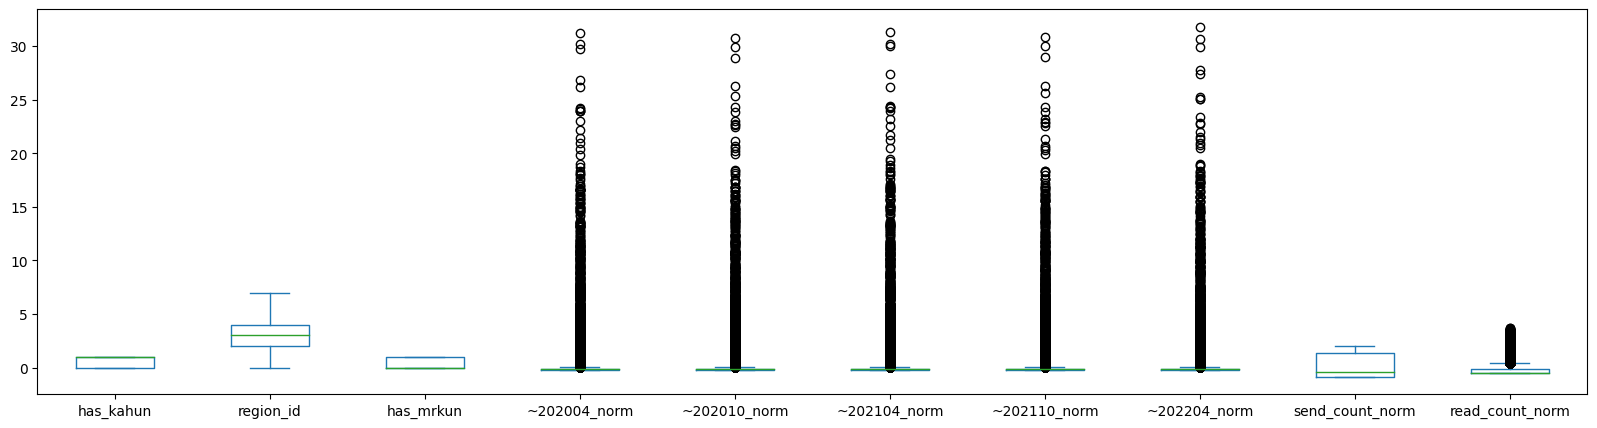

In [23]:
x=sales_norm.drop(["hospital_id","dr_count","has_visit"],axis=1)
x.plot.box(figsize=(20,5))

<AxesSubplot: ylabel='Frequency'>

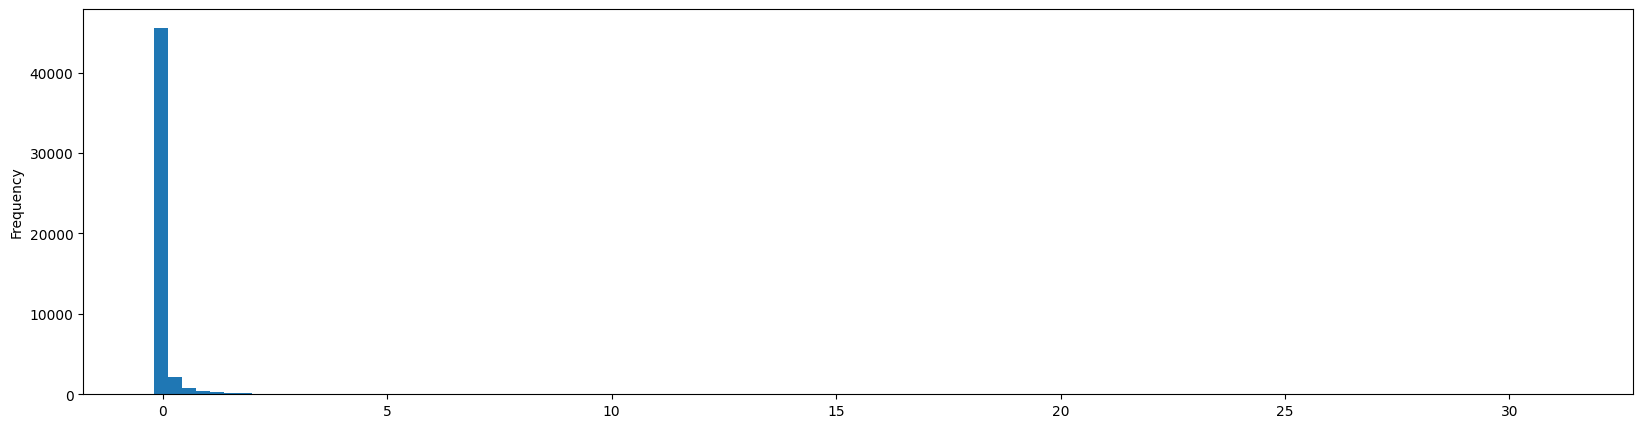

In [24]:
sales_norm["~202004_norm"].plot.hist(bins=100,figsize=(20,5))

地域毎の相関行列

In [25]:
for i in range(8):
    print(region[i])
    display(sales_mrkun[sales_mrkun["send_count"] != 0][sales_mrkun["region_id"]==i][sales_mrkun["has_visit"]==0].corr().style.background_gradient(axis=None))

北海道


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1215692533.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_mrkun[sales_mrkun["send_count"] != 0][sales_mrkun["region_id"]==i][sales_mrkun["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.047964,-0.050155,-0.047239,-0.049769,-0.044985,-0.007134,0.000656,0.000101,-0.024419,nan,nan,0.040130
~202004_ave,-0.047964,1.000000,0.998189,0.999798,0.998753,0.999038,0.522154,0.526324,0.512111,0.115147,nan,nan,0.139726
~202010_ave,-0.050155,0.998189,1.000000,0.996780,0.999947,0.995120,0.515346,0.519457,0.508322,0.116602,nan,nan,0.144954
~202104_ave,-0.047239,0.999798,0.996780,1.000000,0.997548,0.999544,0.524217,0.528415,0.513237,0.114571,nan,nan,0.137845
~202110_ave,-0.049769,0.998753,0.999947,0.997548,1.000000,0.996040,0.516563,0.520682,0.509005,0.116376,nan,nan,0.144124
~202204_ave,-0.044985,0.999038,0.995120,0.999544,0.996040,1.000000,0.531980,0.536434,0.520476,0.113741,nan,nan,0.141108
dr_count,-0.007134,0.522154,0.515346,0.524217,0.516563,0.531980,1.000000,0.984171,0.937436,0.167968,nan,nan,0.160480
send_count,0.000656,0.526324,0.519457,0.528415,0.520682,0.536434,0.984171,1.000000,0.955578,0.167410,nan,nan,0.161664
read_count,0.000101,0.512111,0.508322,0.513237,0.509005,0.520476,0.937436,0.955578,1.000000,0.166481,nan,nan,0.285760
has_kahun,-0.024419,0.115147,0.116602,0.114571,0.116376,0.113741,0.167968,0.167410,0.166481,1.000000,nan,nan,0.123248


東北


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.010064,0.008948,0.010427,0.009136,0.009750,0.023723,0.017433,0.010307,0.029667,nan,nan,-0.031256
~202004_ave,0.010064,1.000000,0.998485,0.999829,0.998953,0.999303,0.219121,0.213678,0.242895,0.051539,nan,nan,0.104925
~202010_ave,0.008948,0.998485,1.000000,0.997297,0.999957,0.996721,0.229674,0.223972,0.254405,0.054470,nan,nan,0.106860
~202104_ave,0.010427,0.999829,0.997297,1.000000,0.997937,0.999490,0.215386,0.210038,0.238837,0.050513,nan,nan,0.104205
~202110_ave,0.009136,0.998953,0.999957,0.997937,1.000000,0.997369,0.227949,0.222288,0.252520,0.054010,nan,nan,0.106569
~202204_ave,0.009750,0.999303,0.996721,0.999490,0.997369,1.000000,0.221312,0.216165,0.246106,0.052834,nan,nan,0.113625
dr_count,0.023723,0.219121,0.229674,0.215386,0.227949,0.221312,1.000000,0.990610,0.960653,0.127180,nan,nan,0.159776
send_count,0.017433,0.213678,0.223972,0.210038,0.222288,0.216165,0.990610,1.000000,0.969150,0.121893,nan,nan,0.157854
read_count,0.010307,0.242895,0.254405,0.238837,0.252520,0.246106,0.960653,0.969150,1.000000,0.117577,nan,nan,0.284173
has_kahun,0.029667,0.051539,0.054470,0.050513,0.054010,0.052834,0.127180,0.121893,0.117577,1.000000,nan,nan,0.061648


関東


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.000616,-0.000534,-0.000652,-0.000545,-0.000478,-0.003071,-0.002739,-0.002998,-0.038311,nan,nan,-0.000421
~202004_ave,-0.000616,1.000000,0.996393,0.999558,0.997484,0.998725,0.153448,0.156086,0.165529,0.059929,nan,nan,0.120707
~202010_ave,-0.000534,0.996393,1.000000,0.993433,0.999902,0.991562,0.155042,0.157672,0.167310,0.060553,nan,nan,0.120539
~202104_ave,-0.000652,0.999558,0.993433,1.000000,0.994937,0.999532,0.152636,0.155273,0.164630,0.059624,nan,nan,0.120553
~202110_ave,-0.000545,0.997484,0.999902,0.994937,1.000000,0.993236,0.154851,0.157483,0.167093,0.060473,nan,nan,0.120636
~202204_ave,-0.000478,0.998725,0.991562,0.999532,0.993236,1.000000,0.153972,0.156752,0.166510,0.060418,nan,nan,0.127068
dr_count,-0.003071,0.153448,0.155042,0.152636,0.154851,0.153972,1.000000,0.995065,0.981396,0.106226,nan,nan,0.127154
send_count,-0.002739,0.156086,0.157672,0.155273,0.157483,0.156752,0.995065,1.000000,0.986336,0.106543,nan,nan,0.130389
read_count,-0.002998,0.165529,0.167310,0.164630,0.167093,0.166510,0.981396,0.986336,1.000000,0.113658,nan,nan,0.199795
has_kahun,-0.038311,0.059929,0.060553,0.059624,0.060473,0.060418,0.106226,0.106543,0.113658,1.000000,nan,nan,0.121491


中部


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.002285,0.001988,0.002380,0.002038,0.001841,-0.050657,-0.052177,-0.052688,-0.011569,nan,nan,-0.042403
~202004_ave,0.002285,1.000000,0.998289,0.999798,0.998813,0.999104,0.174142,0.175009,0.183586,0.049646,nan,nan,0.122069
~202010_ave,0.001988,0.998289,1.000000,0.996914,0.999952,0.995514,0.176482,0.177442,0.186754,0.050258,nan,nan,0.124173
~202104_ave,0.002380,0.999798,0.996914,1.000000,0.997633,0.999550,0.173222,0.174056,0.182374,0.049415,nan,nan,0.121284
~202110_ave,0.002038,0.998813,0.999952,0.997633,1.000000,0.996350,0.176127,0.177073,0.186261,0.050171,nan,nan,0.123841
~202204_ave,0.001841,0.999104,0.995514,0.999550,0.996350,1.000000,0.176566,0.177561,0.186481,0.050047,nan,nan,0.128861
dr_count,-0.050657,0.174142,0.176482,0.173222,0.176127,0.176566,1.000000,0.992062,0.972649,0.109662,nan,nan,0.128559
send_count,-0.052177,0.175009,0.177442,0.174056,0.177073,0.177561,0.992062,1.000000,0.980782,0.109648,nan,nan,0.131286
read_count,-0.052688,0.183586,0.186754,0.182374,0.186261,0.186481,0.972649,0.980782,1.000000,0.108816,nan,nan,0.225643
has_kahun,-0.011569,0.049646,0.050258,0.049415,0.050171,0.050047,0.109662,0.109648,0.108816,1.000000,nan,nan,0.046067


近畿


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.004542,0.003174,0.004985,0.003404,0.006411,-0.018214,-0.019360,-0.019671,0.004823,nan,nan,-0.011977
~202004_ave,0.004542,1.000000,0.998630,0.999841,0.999051,0.999082,0.127235,0.126945,0.123889,0.047502,nan,nan,0.079241
~202010_ave,0.003174,0.998630,1.000000,0.997542,0.999961,0.995996,0.130787,0.130394,0.127162,0.049444,nan,nan,0.080512
~202104_ave,0.004985,0.999841,0.997542,1.000000,0.998118,0.999512,0.126014,0.125757,0.122762,0.046814,nan,nan,0.078789
~202110_ave,0.003404,0.999051,0.999961,0.998118,1.000000,0.996703,0.130217,0.129842,0.126639,0.049130,nan,nan,0.080306
~202204_ave,0.006411,0.999082,0.995996,0.999512,0.996703,1.000000,0.126158,0.125856,0.123390,0.046693,nan,nan,0.084698
dr_count,-0.018214,0.127235,0.130787,0.126014,0.130217,0.126158,1.000000,0.994902,0.979706,0.095342,nan,nan,0.107965
send_count,-0.019360,0.126945,0.130394,0.125757,0.129842,0.125856,0.994902,1.000000,0.983751,0.095564,nan,nan,0.110303
read_count,-0.019671,0.123889,0.127162,0.122762,0.126639,0.123390,0.979706,0.983751,1.000000,0.095138,nan,nan,0.191646
has_kahun,0.004823,0.047502,0.049444,0.046814,0.049130,0.046693,0.095342,0.095564,0.095138,1.000000,nan,nan,0.077995


中国


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.003808,0.003308,0.004061,0.003363,0.002742,0.040581,0.042344,0.039647,0.032943,nan,nan,0.005880
~202004_ave,0.003808,1.000000,0.998315,0.999818,0.998849,0.999114,0.144579,0.143868,0.156353,0.068051,nan,nan,0.095710
~202010_ave,0.003308,0.998315,1.000000,0.997035,0.999948,0.995871,0.157654,0.157465,0.169301,0.071458,nan,nan,0.098583
~202104_ave,0.004061,0.999818,0.997035,1.000000,0.997757,0.999450,0.141645,0.140816,0.153425,0.066898,nan,nan,0.094759
~202110_ave,0.003363,0.998849,0.999948,0.997757,1.000000,0.996671,0.154798,0.154497,0.166483,0.070879,nan,nan,0.098088
~202204_ave,0.002742,0.999114,0.995871,0.999450,0.996671,1.000000,0.142748,0.142024,0.155913,0.067448,nan,nan,0.104814
dr_count,0.040581,0.144579,0.157654,0.141645,0.154798,0.142748,1.000000,0.993355,0.975756,0.101029,nan,nan,0.115307
send_count,0.042344,0.143868,0.157465,0.140816,0.154497,0.142024,0.993355,1.000000,0.981117,0.101209,nan,nan,0.117093
read_count,0.039647,0.156353,0.169301,0.153425,0.166483,0.155913,0.975756,0.981117,1.000000,0.104616,nan,nan,0.214778
has_kahun,0.032943,0.068051,0.071458,0.066898,0.070879,0.067448,0.101029,0.101209,0.104616,1.000000,nan,nan,0.096705


四国


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.020630,-0.020396,-0.020691,-0.020436,-0.020072,-0.023936,-0.022935,-0.031649,-0.019743,nan,nan,-0.005910
~202004_ave,-0.020630,1.000000,0.997435,0.999685,0.998210,0.998990,0.015769,0.014743,0.004652,0.042826,nan,nan,-0.086433
~202010_ave,-0.020396,0.997435,1.000000,0.995326,0.999930,0.993295,0.016143,0.015255,0.004667,0.044121,nan,nan,-0.089618
~202104_ave,-0.020691,0.999685,0.995326,1.000000,0.996396,0.999774,0.015616,0.014543,0.004639,0.042308,nan,nan,-0.085220
~202110_ave,-0.020436,0.998210,0.999930,0.996396,1.000000,0.994585,0.016088,0.015177,0.004668,0.043927,nan,nan,-0.089118
~202204_ave,-0.020072,0.998990,0.993295,0.999774,0.994585,1.000000,0.016848,0.015675,0.006104,0.041952,nan,nan,-0.082411
dr_count,-0.023936,0.015769,0.016143,0.015616,0.016088,0.016848,1.000000,0.992160,0.972439,0.097282,nan,nan,0.125653
send_count,-0.022935,0.014743,0.015255,0.014543,0.015177,0.015675,0.992160,1.000000,0.976497,0.096369,nan,nan,0.127572
read_count,-0.031649,0.004652,0.004667,0.004639,0.004668,0.006104,0.972439,0.976497,1.000000,0.094373,nan,nan,0.207373
has_kahun,-0.019743,0.042826,0.044121,0.042308,0.043927,0.041952,0.097282,0.096369,0.094373,1.000000,nan,nan,0.086055


九州


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.030307,0.031662,0.029807,0.031450,0.029514,0.005860,0.002375,0.002256,0.009565,nan,nan,0.022068
~202004_ave,0.030307,1.000000,0.997361,0.999681,0.998160,0.998792,0.221621,0.218341,0.222559,0.058595,nan,nan,0.121248
~202010_ave,0.031662,0.997361,1.000000,0.995210,0.999928,0.993320,0.220873,0.217088,0.221439,0.059842,nan,nan,0.123939
~202104_ave,0.029807,0.999681,0.995210,1.000000,0.996311,0.999461,0.221611,0.218513,0.222675,0.058054,nan,nan,0.120159
~202110_ave,0.031450,0.998160,0.999928,0.996311,1.000000,0.994585,0.221077,0.217373,0.221705,0.059664,nan,nan,0.123538
~202204_ave,0.029514,0.998792,0.993320,0.999461,0.994585,1.000000,0.223245,0.220122,0.224763,0.059718,nan,nan,0.127798
dr_count,0.005860,0.221621,0.220873,0.221611,0.221077,0.223245,1.000000,0.994903,0.981679,0.088039,nan,nan,0.103144
send_count,0.002375,0.218341,0.217088,0.218513,0.217373,0.220122,0.994903,1.000000,0.987031,0.084834,nan,nan,0.101980
read_count,0.002256,0.222559,0.221439,0.222675,0.221705,0.224763,0.981679,0.987031,1.000000,0.091460,nan,nan,0.178188
has_kahun,0.009565,0.058595,0.059842,0.058054,0.059664,0.059718,0.088039,0.084834,0.091460,1.000000,nan,nan,0.117389


read効果評価

In [26]:
sales_mrkun.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50372 entries, 0 to 50371
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hospital_id  50372 non-null  int64  
 1   ~202004_ave  50372 non-null  int64  
 2   ~202010_ave  50372 non-null  int64  
 3   ~202104_ave  50372 non-null  int64  
 4   ~202110_ave  50372 non-null  int64  
 5   ~202204_ave  50372 non-null  int64  
 6   dr_count     50372 non-null  float64
 7   send_count   50372 non-null  float64
 8   read_count   50372 non-null  float64
 9   has_kahun    50372 non-null  float64
 10  has_visit    50372 non-null  float64
 11  region_id    50372 non-null  int64  
 12  has_mrkun    50372 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.4 MB


In [27]:
print("read_count == 0")
print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0].describe())
print("read_count != 0")
print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0].describe())

read_count == 0
count    3.286900e+04
mean     4.778344e+04
std      1.901470e+05
min      0.000000e+00
25%      4.220000e+03
50%      1.080400e+04
75%      2.881600e+04
max      6.519044e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    1.750300e+04
mean     1.106572e+05
std      4.626747e+05
min      0.000000e+00
25%      4.390500e+03
50%      1.403200e+04
75%      4.614700e+04
max      9.030543e+06
Name: ~202004_ave, dtype: float64


In [28]:
for i in range(8):
    print(region[i])
    print("read_count == 0")
    print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==i].describe())
    print("read_count != 0")
    print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==i].describe())
    print("")

北海道
read_count == 0
count    1.124000e+03
mean     5.297677e+04
std      2.087174e+05
min      0.000000e+00
25%      4.113000e+03
50%      1.042350e+04
75%      2.824525e+04
max      3.152481e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    8.360000e+02
mean     1.275970e+05
std      4.377886e+05
min      0.000000e+00
25%      6.482000e+03
50%      1.801100e+04
75%      6.805625e+04
max      7.515971e+06
Name: ~202004_ave, dtype: float64

東北
read_count == 0
count    2.542000e+03
mean     4.869159e+04
std      2.154179e+05
min      0.000000e+00
25%      3.932500e+03
50%      9.974500e+03
75%      2.718450e+04
max      4.828929e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    1.120000e+03
mean     1.247668e+05
std      5.479308e+05
min      3.000000e+00
25%      3.482000e+03
50%      1.058350e+04
75%      3.768075e+04
max      5.701991e+06
Name: ~202004_ave, dtype: float64

関東
read_count == 0
count    1.043000e+04
mean     5.699559e+04
std      1.807042e+05
mi

count    5.390000e+03
mean     4.283923e+04
std      1.498022e+05
min      0.000000e+00
25%      4.457250e+03
50%      1.119100e+04
75%      2.859400e+04
max      5.013038e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    2.669000e+03
mean     1.365663e+05
std      6.010333e+05
min      0.000000e+00
25%      3.286000e+03
50%      1.260500e+04
75%      4.335200e+04
max      9.030543e+06
Name: ~202004_ave, dtype: float64

近畿
read_count == 0
count    5.805000e+03
mean     4.304400e+04
std      1.976759e+05
min      0.000000e+00
25%      4.145000e+03
50%      9.737000e+03
75%      2.421800e+04
max      6.519044e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    3.003000e+03
mean     1.146904e+05
std      5.759436e+05
min      0.000000e+00
25%      2.286000e+03
50%      7.755000e+03
75%      2.425750e+04
max      8.489736e+06
Name: ~202004_ave, dtype: float64

中国
read_count == 0
count    2.275000e+03
mean     3.744468e+04
std      1.610253e+05
min      0.000000e+00


北海道の既読ありなし

北海道


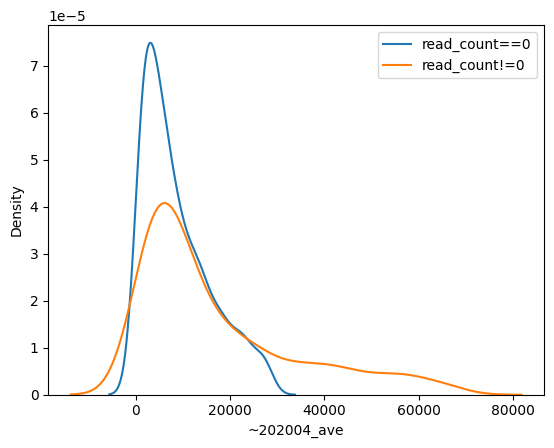

In [29]:
bins = np.linspace(0, 100000, 50)

print(region[0])
sns.kdeplot(data=sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0][sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0]<sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0].quantile(0.75)])
sns.kdeplot(data=sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0][sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0]<sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0].quantile(0.75)])
plt.legend(labels=["read_count==0","read_count!=0"])
plt.show()


**IPW ATT　効果検証**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score
import itertools
import time
from pandas import Series,DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline



共変量確認

In [31]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
clf = linear_model.LinearRegression()

# データフレームの各列を正規化
sales_st = sales_mrkun.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
sales_st.head()
s_c = sales_st.columns.values

# 説明変数に "quality (品質スコア以外すべて)" を利用
for i in range(len(s_c)-1):
    wine2_except_quality = sales_st[s_c[i+1]]
    X = wine2_except_quality.values.reshape(-1, 1)
 
    # 目的変数に "quality (品質スコア)" を利用
    Y = sales_st['~202204_ave'].values
    
    # 予測モデルを作成
    clf.fit(X, Y)
    
    # 偏回帰係数
    print(pd.DataFrame({"Name":s_c[i+1],
                        "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )


          Name  Coefficients
0  ~202004_ave      0.960704
          Name  Coefficients
0  ~202010_ave      0.909738
          Name  Coefficients
0  ~202104_ave      0.977098
          Name  Coefficients
0  ~202110_ave      0.918572
          Name  Coefficients
0  ~202204_ave           1.0
       Name  Coefficients
0  dr_count      0.144247
         Name  Coefficients
0  send_count      0.152547
         Name  Coefficients
0  read_count      0.157615
        Name  Coefficients
0  has_kahun      0.003059
        Name  Coefficients
0  has_visit      0.022509
        Name  Coefficients
0  region_id      0.004581
        Name  Coefficients
0  has_mrkun      0.006931


In [128]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# データフレームの各列を正規化
sales_st = sales_mrkun.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
sales_st.head()

s_c = sales_st.columns.values

# 説明変数に "quality (品質スコア以外すべて)" を利用
name = []
coef = []
for i in range(len(s_c)-1):
    
    wine2_except_quality = sales_st[s_c[i+1]]
    X = wine2_except_quality.values.reshape(-1, 1)
 
    # 目的変数に "quality (品質スコア)" を利用
    Y = sales_st['has_mrkun'].values
    
    # 予測モデルを作成
    clf.fit(X, Y)
    name.append(s_c[i+1])
    coef.append(np.abs(clf.coef_)[0])
    # 偏回帰係数
coef_mrkun =pd.DataFrame({"Name":name,"Coefficients":coef}).sort_values(by='Coefficients')
display(coef_mrkun)
coef_mrkun.to_csv("coef_mrkun.csv", index = False)

,Name,Coefficients
10,region_id,0.005809
9,has_visit,0.177236
8,has_kahun,0.189032
11,has_mrkun,1.000000
1,~202010_ave,1.262597
3,~202110_ave,1.269756
0,~202004_ave,1.302122
2,~202104_ave,1.313798
4,~202204_ave,1.402001
5,dr_count,3.781114


In [146]:
name = []
r_squared_mrkun = []
for i in range(len(s_c)-1):
    target = "has_mrkun"
    features = s_c[i+1]
    if features != "has_mrkun":
        y = sales_mrkun[target].to_numpy()
        X = StandardScaler().fit_transform(sales_mrkun[features].values.reshape(-1, 1))

        model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
        name.append(s_c[i+1])
        r_squared_mrkun.append(abs(model.pseudo_rsquared()))
r_squared_mrkun = pd.DataFrame({"Name":name,"R_squared":r_squared_mrkun}).sort_values(by='R_squared')
r_squared_mrkun.to_csv("r_squared_mrkun.csv", index = False)
r_squared_mrkun


,Name,R_squared
8,has_kahun,0.063446
9,has_visit,0.076032
4,~202204_ave,0.085783
1,~202010_ave,0.086873
3,~202110_ave,0.086935
0,~202004_ave,0.087261
2,~202104_ave,0.087405
10,region_id,0.099159
5,dr_count,0.193835
6,send_count,0.357946


In [150]:
name = []
r_squared_2204 = []
for i in range(len(s_c)-1):
    target = "~202204_ave"
    features = s_c[i+1]
    if features != "~202204_ave":
        y = sales_mrkun[target].to_numpy()
        X = StandardScaler().fit_transform(sales_mrkun[features].values.reshape(-1, 1))

        model = sm.OLS(y, X).fit()
        name.append(s_c[i+1])
        r_squared_2204.append(abs(model.rsquared))
r_squared_2204 = pd.DataFrame({"Name":name,"R_squared":r_squared_2204}).sort_values(by='R_squared')
r_squared_2204.to_csv("r_squared_2204.csv", index = False)
r_squared_2204

,Name,R_squared
9,region_id,0.001335
7,has_kahun,0.001830
4,dr_count,0.008859
10,has_mrkun,0.009287
5,send_count,0.009479
6,read_count,0.010596
8,has_visit,0.072366
1,~202010_ave,0.948678
3,~202110_ave,0.949944
0,~202004_ave,0.953955


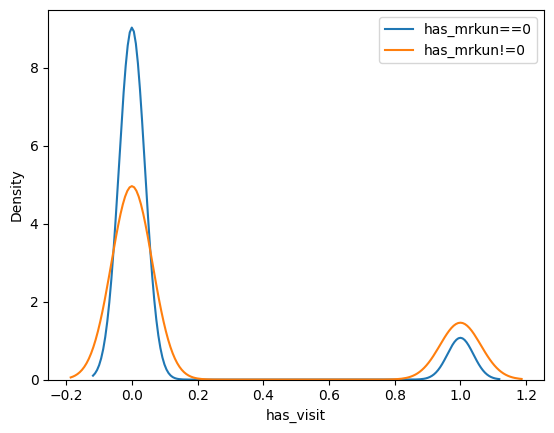

In [33]:
#for i in range(len(sales_mrkun.columns.values)):
bins = np.linspace(0, 100000, 50)

sns.kdeplot(data=sales_mrkun["has_visit"][sales_mrkun["has_mrkun"]==0][sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))])
sns.kdeplot(data=sales_mrkun["has_visit"][sales_mrkun["has_mrkun"]==1][sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))])
plt.legend(labels=["has_mrkun==0","has_mrkun!=0"])
plt.show()

In [101]:
sales_m = sales_mrkun[sales_mrkun.columns.values]#[sales_mrkun["~202204_ave"]>=sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","region_id","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
count,50372.000000,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000
mean,53340.601525,6.963048e+04,4.491404e+04,8.659760e+04,4.767636e+04,9.943224e+04,7.101882,85.931251,35.100413,0.643393,0.212836,3.348904,0.347475
std,27420.555444,3.144346e+05,1.985496e+05,3.941538e+05,2.114760e+05,4.616719e+05,45.096622,457.376576,180.753527,0.479002,0.409317,1.912278,0.476173
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29566.500000,4.261500e+03,2.899000e+03,5.195750e+03,3.055000e+03,5.822000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,53456.500000,1.176800e+04,7.759500e+03,1.448950e+04,8.219000e+03,1.622400e+04,1.000000,45.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,76992.250000,3.359875e+04,2.189900e+04,4.167500e+04,2.319300e+04,4.706725e+04,2.000000,51.000000,36.000000,1.000000,0.000000,4.000000,1.000000
max,100795.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,1.000000,7.000000,1.000000


In [102]:
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792


Optimization terminated successfully.
         Current function value: 0.615497
         Iterations 5
AUC = 0.649


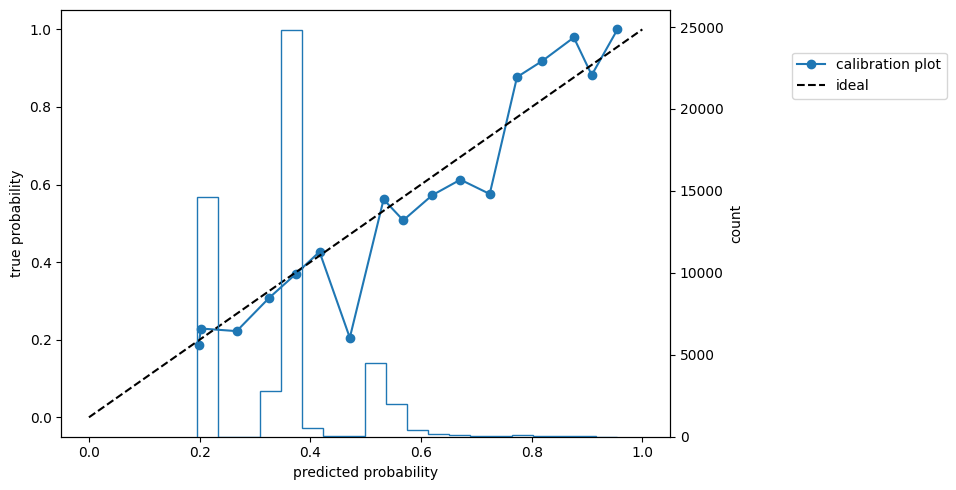

In [103]:
_, ax1 = plt.subplots(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_true=Z, y_prob=ps, n_bins=20)
ax1.plot(prob_pred, prob_true, marker='o', label='calibration plot')
ax1.plot([0,1], [0,1], linestyle='--', color='black', label='ideal')
ax1.legend(bbox_to_anchor=(1.2, 0.9), loc='upper left', borderaxespad=0)
ax1.set_xlabel('predicted probability')
ax1.set_ylabel('true probability')

ax2 = ax1.twinx()
ax2.hist(ps, bins=20, histtype='step', rwidth=0.9)
ax2.set_ylabel('count')
plt.tight_layout()
plt.show()


In [104]:
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)


print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list), np.std(ATT_list)*1.96, np.std(ATT_list)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)


ATT = 18872.699 ± 28370.401 (s.d.=14474.695)


In [105]:
n = sales_m.shape[0]
return_n = n*np.mean(ATT_list)
return_n/80000000

11.883194749471926

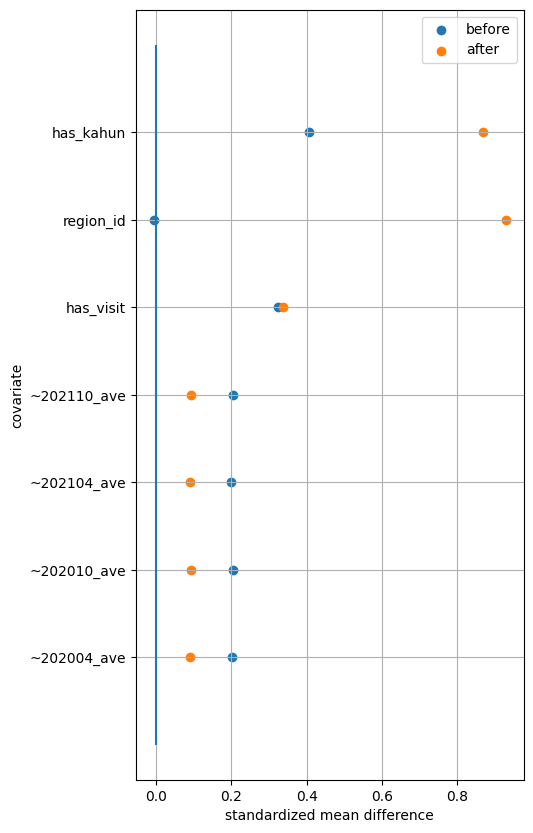

In [106]:
def standardized_mean_difference(X1, X0): # SMDを計算する関数
    N1 = len(X1)
    N0 = len(X0)
    s_pool = ((N1-1)*np.var(X1)+(N0-1)*np.var(X0))/(N1+N0-2)

    return (np.mean(X1)-np.mean(X0))/np.sqrt(s_pool)

def smd_on_the_treated(X, Z, ps): # 傾向スコアを用いた調整前後のSMDを計算する関数
    X1 = X[Z==1]
    X0 = X[Z==0]
    ps0 = ps[Z==0]
    X10 = X0*ps0/(1-ps0+epsilon)

    smd_before = standardized_mean_difference(X1, X0)
    smd_after = standardized_mean_difference(X1, X10)

    return smd_before, smd_after

# 各共変量について、傾向スコアを用いた調整前後のSMDを計算する
smd_list = []
for name in X.columns:
    smd_before, smd_after = smd_on_the_treated(X=X[name], Z=Z, ps=ps)
    smd_list.append([name, smd_before, smd_after])
smd_df = pd.DataFrame(smd_list, columns=['covariate', 'SMD(before)', 'SMD(after)'])

# 各共変量について、傾向スコアを用いた調整前後のSMDをプロットする（love plotを作成する）
plt.figure(figsize=(5, 10))
plt.scatter(smd_df['SMD(before)'], smd_df['covariate'], label='before')
plt.scatter(smd_df['SMD(after)'], smd_df['covariate'], label='after')
plt.vlines([0], ymin=-1, ymax=X.shape[1])
plt.legend()
plt.xlabel('standardized mean difference')
plt.ylabel('covariate')
plt.grid(True)
plt.show()


**MR訪問あり**

In [40]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["has_visit"] == 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_mr1 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","region_id","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792

Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_MR1 = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_MR1), np.std(ATT_list_MR1)*1.96, np.std(ATT_list_MR1)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)


Optimization terminated successfully.
         Current function value: 0.602050
         Iterations 6
AUC = 0.628
ATT = -2199932.411 ± 2858239.598 (s.d.=1458285.509)


In [41]:
n_MR1 = sales_m.shape[0]
n_MR1
return_MR1 = n_MR1*np.mean(ATT_list_MR1)
return_MR1

-87229520019.96945

In [42]:
sales_mr1.describe()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
count,39651.000000,3.965100e+04,3.965100e+04,3.965100e+04,3.965100e+04,3.965100e+04,39651.000000,39651.000000,39651.000000,39651.000000,39651.0,39651.000000,39651.000000
mean,53422.544450,2.371795e+04,1.530370e+04,2.949198e+04,1.624453e+04,3.337324e+04,5.573504,69.224358,27.762326,0.630552,0.0,3.411364,0.309753
std,27397.809304,7.601598e+04,4.808181e+04,9.525355e+04,5.119472e+04,1.081304e+05,37.953362,383.930776,152.332677,0.482662,0.0,1.938143,0.462397
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,29697.500000,4.083000e+03,2.769000e+03,4.977000e+03,2.913000e+03,5.562500e+03,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000
50%,53590.000000,9.852000e+03,6.520000e+03,1.214100e+04,6.900000e+03,1.362000e+04,1.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
75%,77040.500000,2.370050e+04,1.536700e+04,2.943750e+04,1.631600e+04,3.301750e+04,2.000000,51.000000,14.000000,1.000000,0.0,4.000000,1.000000
max,100795.000000,5.080574e+06,3.081002e+06,6.451667e+06,3.304782e+06,7.266265e+06,1951.000000,19770.000000,7990.000000,1.000000,0.0,7.000000,1.000000


**MR訪問なし**

In [43]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["has_visit"] != 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_mr0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","region_id","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_MR0 = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_MR0), np.std(ATT_list_MR0)*1.96, np.std(ATT_list_MR0)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.661102
         Iterations 5
AUC = 0.569
ATT = 78385.237 ± 57371.654 (s.d.=29271.252)


In [44]:
n_MR0 = sales_m.shape[0]
n_MR0
return_MR0 = n_MR0*np.mean(ATT_list_MR0)
return_MR0

840368130.9870903

In [45]:
sales_mr0.describe()    

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_kahun,has_visit,region_id,has_mrkun
count,10721.000000,1.072100e+04,1.072100e+04,1.072100e+04,1.072100e+04,1.072100e+04,10721.000000,10721.000000,10721.000000,10721.000000,10721.0,10721.000000,10721.000000
mean,53037.540341,2.394353e+05,1.544262e+05,2.977994e+05,1.639252e+05,3.437476e+05,12.754501,147.720735,62.239903,0.690887,1.0,3.117899,0.486988
std,27503.676724,6.376198e+05,4.018051e+05,7.998495e+05,4.281079e+05,9.393730e+05,64.711214,657.956127,258.366262,0.462149,0.0,1.794711,0.499854
min,5749.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,29136.000000,7.177000e+03,4.981000e+03,8.586000e+03,5.231000e+03,9.510000e+03,1.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000
50%,53011.000000,4.174700e+04,2.782100e+04,5.107000e+04,2.951100e+04,5.751900e+04,1.000000,48.000000,0.000000,1.000000,1.0,3.000000,0.000000
75%,76790.000000,1.701100e+05,1.110870e+05,2.099490e+05,1.177710e+05,2.391230e+05,3.000000,54.000000,49.000000,1.000000,1.0,4.000000,1.000000
max,100793.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,1.0,7.000000,1.000000


In [46]:
return_MR0+return_MR1

-86389151888.98236

**北海道**

In [47]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_ho = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_ho), np.std(ATT_list_re0_ho)*1.96, np.std(ATT_list_re0_ho)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.644266
         Iterations 7
AUC = 0.672
ATT = -7602.039 ± 120226.001 (s.d.=61339.796)


In [48]:
n_re0_ho = sales_m.shape[0]
n_re0_ho
return_re0_ho = n_re0_ho*np.mean(ATT_list_re0_ho)
return_re0_ho

-14899996.801059844

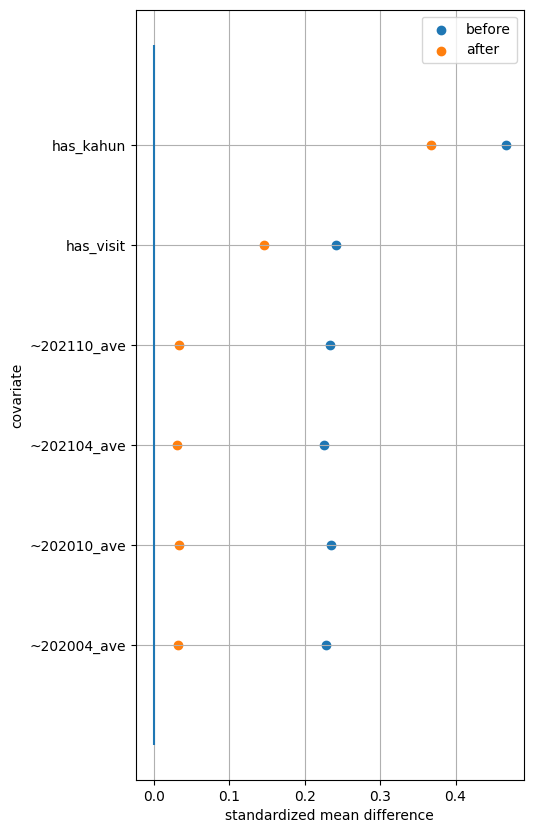

In [49]:
def standardized_mean_difference(X1, X0): # SMDを計算する関数
    N1 = len(X1)
    N0 = len(X0)
    s_pool = ((N1-1)*np.var(X1)+(N0-1)*np.var(X0))/(N1+N0-2)

    return (np.mean(X1)-np.mean(X0))/np.sqrt(s_pool)

def smd_on_the_treated(X, Z, ps): # 傾向スコアを用いた調整前後のSMDを計算する関数
    X1 = X[Z==1]
    X0 = X[Z==0]
    ps0 = ps[Z==0]
    X10 = X0*ps0/(1-ps0+epsilon)

    smd_before = standardized_mean_difference(X1, X0)
    smd_after = standardized_mean_difference(X1, X10)

    return smd_before, smd_after

# 各共変量について、傾向スコアを用いた調整前後のSMDを計算する
smd_list = []
for name in X.columns:
    smd_before, smd_after = smd_on_the_treated(X=X[name], Z=Z, ps=ps)
    smd_list.append([name, smd_before, smd_after])
smd_df = pd.DataFrame(smd_list, columns=['covariate', 'SMD(before)', 'SMD(after)'])

# 各共変量について、傾向スコアを用いた調整前後のSMDをプロットする（love plotを作成する）
plt.figure(figsize=(5, 10))
plt.scatter(smd_df['SMD(before)'], smd_df['covariate'], label='before')
plt.scatter(smd_df['SMD(after)'], smd_df['covariate'], label='after')
plt.vlines([0], ymin=-1, ymax=X.shape[1])
plt.legend()
plt.xlabel('standardized mean difference')
plt.ylabel('covariate')
plt.grid(True)
plt.show()


**東北**

In [50]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 1]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_to = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_to), np.std(ATT_list_re0_to)*1.96, np.std(ATT_list_re0_to)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.587542
         Iterations 8
AUC = 0.647
ATT = 35033.270 ± 84111.382 (s.d.=42913.970)


In [51]:
n_re0_to = sales_m.shape[0]
return_re0_to = n_re0_to*np.mean(ATT_list_re0_to)
return_re0_to

128291833.72759295

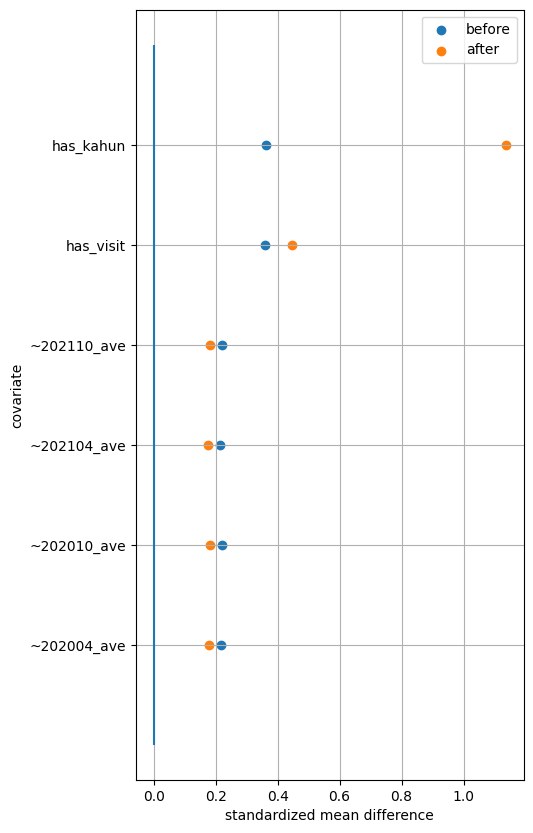

In [52]:
def standardized_mean_difference(X1, X0): # SMDを計算する関数
    N1 = len(X1)
    N0 = len(X0)
    s_pool = ((N1-1)*np.var(X1)+(N0-1)*np.var(X0))/(N1+N0-2)

    return (np.mean(X1)-np.mean(X0))/np.sqrt(s_pool)

def smd_on_the_treated(X, Z, ps): # 傾向スコアを用いた調整前後のSMDを計算する関数
    X1 = X[Z==1]
    X0 = X[Z==0]
    ps0 = ps[Z==0]
    X10 = X0*ps0/(1-ps0+epsilon)

    smd_before = standardized_mean_difference(X1, X0)
    smd_after = standardized_mean_difference(X1, X10)

    return smd_before, smd_after

# 各共変量について、傾向スコアを用いた調整前後のSMDを計算する
smd_list = []
for name in X.columns:
    smd_before, smd_after = smd_on_the_treated(X=X[name], Z=Z, ps=ps)
    smd_list.append([name, smd_before, smd_after])
smd_df = pd.DataFrame(smd_list, columns=['covariate', 'SMD(before)', 'SMD(after)'])

# 各共変量について、傾向スコアを用いた調整前後のSMDをプロットする（love plotを作成する）
plt.figure(figsize=(5, 10))
plt.scatter(smd_df['SMD(before)'], smd_df['covariate'], label='before')
plt.scatter(smd_df['SMD(after)'], smd_df['covariate'], label='after')
plt.vlines([0], ymin=-1, ymax=X.shape[1])
plt.legend()
plt.xlabel('standardized mean difference')
plt.ylabel('covariate')
plt.grid(True)
plt.show()


**関東**

In [53]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 2]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_ka = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_ka), np.std(ATT_list_re0_ka)*1.96, np.std(ATT_list_re0_ka)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.612297
         Iterations 5
AUC = 0.671
ATT = 19245.733 ± 37574.086 (s.d.=19170.452)


In [54]:
n_re0_ka = sales_m.shape[0]
return_re0_ka = n_re0_ka*np.mean(ATT_list_re0_ka)
return_re0_ka

310760846.16216695

**中部**

In [55]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 3]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_tu = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_tu), np.std(ATT_list_re0_tu)*1.96, np.std(ATT_list_re0_tu)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.604780
         Iterations 6
AUC = 0.649
ATT = 49335.507 ± 102420.767 (s.d.=52255.493)


In [56]:
n_re0_tu = sales_m.shape[0]
return_re0_tu = n_re0_tu*np.mean(ATT_list_re0_tu)
return_re0_tu

397594852.43750787

**関西**

In [57]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 4]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_sa = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_sa), np.std(ATT_list_re0_sa)*1.96, np.std(ATT_list_re0_sa)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.617637
         Iterations 6
AUC = 0.633
ATT = 20445.336 ± 90645.542 (s.d.=46247.726)


In [58]:
n_re0_sa = sales_m.shape[0]
return_re0_sa= n_re0_tu*np.mean(ATT_list_re0_sa)
return_re0_sa

164768959.3978071

**中国**

In [59]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 5]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_chu = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_chu), np.std(ATT_list_re0_chu)*1.96, np.std(ATT_list_re0_chu)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.620254
         Iterations 5
AUC = 0.658
ATT = -13303.147 ± 66428.783 (s.d.=33892.236)


In [60]:
n_re0_chu = sales_m.shape[0]
return_re0_chu= n_re0_chu*np.mean(ATT_list_re0_chu)
return_re0_chu

-47172958.30627361

**四国**

In [61]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 6]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_si = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_si), np.std(ATT_list_re0_si)*1.96, np.std(ATT_list_re0_si)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.636697
         Iterations 5
AUC = 0.582
ATT = 11018.672 ± 46202.269 (s.d.=23572.586)


In [62]:
n_re0_si = sales_m.shape[0]
return_re0_si = n_re0_si*np.mean(ATT_list_re0_si)
return_re0_si

19106376.779810924

**九州**

In [63]:
sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 7][sales_mrkun["region_id"] == 7]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
sales_re0 = sales_m.copy()
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit","has_kahun"]]
Z = sales_m["has_mrkun"]
sales_m.describe()  
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-8
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)
    ATT_list_re0_ku = ATT_list

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_ku), np.std(ATT_list_re0_ku)*1.96, np.std(ATT_list_re0_ku)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)

Optimization terminated successfully.
         Current function value: 0.616964
         Iterations 5
AUC = 0.656
ATT = 3373.780 ± 24991.466 (s.d.=12750.748)


In [64]:
n_re0_ku = sales_m.shape[0]
return_re0_ku = n_re0_ku*np.mean(ATT_list_re0_ku)
return_re0_ku

21781120.565814752

In [65]:
return_region = return_re0_ho+return_re0_to+return_re0_ka+return_re0_tu+return_re0_sa+return_re0_chu+return_re0_si+return_re0_ku
ROI_region = return_region/80000000
ROI_region

12.252887924542089

In [202]:
return_region = []
hos_region = []
return_region_kahun = []
for k in range(8):  
    return_re0 = []
    hos_count = []
    for j in range(2):
        sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
        sales_re0 = sales_m.copy()
        X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit"]]
        Z = sales_m["has_mrkun"]
        sales_m.describe()  
        exog = sm.add_constant(X) # 切片の追加
        logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
        logit_res = logit_model.fit(maxiter=100)
        ps = logit_res.predict(exog)
        print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
        # 出力：=> AUC = 0.792
        Y = sales_m['~202204_ave'] # 結果変数（推定対象）
        sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
        ATT_list = []
        epsilon = 1e-8
        E_1 =[]
        E_0 =[]
        for i in range(10000):
            idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
            idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

            Z_tmp = np.r_[Z[idx1], Z[idx0]]
            Y_tmp = np.r_[Y[idx1], Y[idx0]]
            ps_tmp = np.r_[ps[idx1], ps[idx0]]
            w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

            E1 = np.mean(Y_tmp[Z_tmp==1])
            E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
            ATT = E1 - E0
            E_1.append(E1)
            E_0.append(E0)
            ATT_list.append(ATT)
            ATT_list_re0_sa = ATT_list

        print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_sa), np.std(ATT_list_re0_sa)*1.96, np.std(ATT_list_re0_sa)))
        # 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)
        n_re0_sa = sales_m.shape[0]
        return_re0.append(n_re0_sa*np.mean(ATT_list_re0_sa))
        hos_count.append(sales_m.shape[0])
        return_region_kahun.append([region[k],j, n_re0_sa*np.mean(ATT_list_re0_sa), sales_m.shape[0], n_re0_sa*np.mean(ATT_list_re0_sa)/sales_m.shape[0], 100*n_re0_sa*np.mean(ATT_list_re0_sa)/sales_m["~202204_ave"].sum()])
    return_region.append(sum(return_re0))
    hos_region.append(sum(hos_count))

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


Optimization terminated successfully.
         Current function value: 0.579911
         Iterations 10
AUC = 0.546
ATT = -130.300 ± 174106.621 (s.d.=88829.909)
Optimization terminated successfully.
         Current function value: 0.675041
         Iterations 6
AUC = 0.634


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = -35380.462 ± 151650.585 (s.d.=77372.747)
Optimization terminated successfully.
         Current function value: 0.497396
         Iterations 8
AUC = 0.600


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 16284.988 ± 127365.003 (s.d.=64982.144)
Optimization terminated successfully.
         Current function value: 0.641148
         Iterations 7
AUC = 0.606


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 47008.895 ± 94348.591 (s.d.=48137.036)
Optimization terminated successfully.
         Current function value: 0.512342
         Iterations 6
AUC = 0.571


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 10414.844 ± 40670.191 (s.d.=20750.098)
Optimization terminated successfully.
         Current function value: 0.666212
         Iterations 6
AUC = 0.619


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 7372.459 ± 52020.299 (s.d.=26540.969)
Optimization terminated successfully.
         Current function value: 0.528568
         Iterations 10
AUC = 0.602


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 21762.633 ± 55598.165 (s.d.=28366.411)
Optimization terminated successfully.
         Current function value: 0.647680
         Iterations 8
AUC = 0.622


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 58099.913 ± 120130.946 (s.d.=61291.299)
Optimization terminated successfully.
         Current function value: 0.539176
         Iterations 5
AUC = 0.555


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 41157.944 ± 54622.296 (s.d.=27868.518)
Optimization terminated successfully.
         Current function value: 0.660834
         Iterations 6
AUC = 0.591


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 25417.322 ± 93372.982 (s.d.=47639.277)
Optimization terminated successfully.
         Current function value: 0.547262
         Iterations 7
AUC = 0.611


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 11381.367 ± 81829.371 (s.d.=41749.679)
Optimization terminated successfully.
         Current function value: 0.656998
         Iterations 6
AUC = 0.621


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = -8050.948 ± 58397.553 (s.d.=29794.670)
Optimization terminated successfully.
         Current function value: 0.565884
         Iterations 7
AUC = 0.566


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 672.847 ± 67570.992 (s.d.=34474.996)
Optimization terminated successfully.
         Current function value: 0.663456
         Iterations 6
AUC = 0.554


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 14476.788 ± 57805.948 (s.d.=29492.830)
Optimization terminated successfully.
         Current function value: 0.518545
         Iterations 7
AUC = 0.536


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 3644.948 ± 39976.940 (s.d.=20396.398)
Optimization terminated successfully.
         Current function value: 0.671504
         Iterations 5
AUC = 0.619


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/2935789498.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == k][sales_mrkun["has_kahun"]==j]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = -1929.827 ± 32616.923 (s.d.=16641.287)


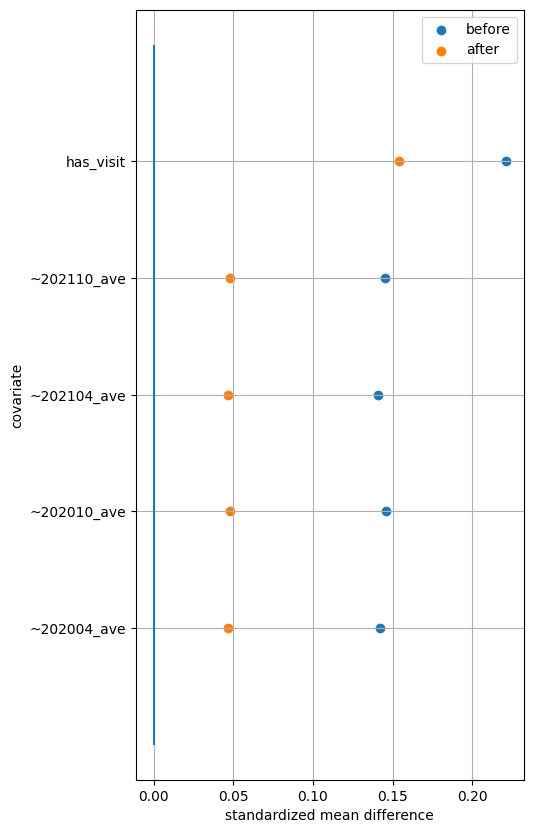

In [108]:
def standardized_mean_difference(X1, X0): # SMDを計算する関数
    N1 = len(X1)
    N0 = len(X0)
    s_pool = ((N1-1)*np.var(X1)+(N0-1)*np.var(X0))/(N1+N0-2)

    return (np.mean(X1)-np.mean(X0))/np.sqrt(s_pool)

def smd_on_the_treated(X, Z, ps): # 傾向スコアを用いた調整前後のSMDを計算する関数
    X1 = X[Z==1]
    X0 = X[Z==0]
    ps0 = ps[Z==0]
    X10 = X0*ps0/(1-ps0+epsilon)

    smd_before = standardized_mean_difference(X1, X0)
    smd_after = standardized_mean_difference(X1, X10)

    return smd_before, smd_after

# 各共変量について、傾向スコアを用いた調整前後のSMDを計算する
smd_list = []
for name in X.columns:
    smd_before, smd_after = smd_on_the_treated(X=X[name], Z=Z, ps=ps)
    smd_list.append([name, smd_before, smd_after])
smd_df = pd.DataFrame(smd_list, columns=['covariate', 'SMD(before)', 'SMD(after)'])

# 各共変量について、傾向スコアを用いた調整前後のSMDをプロットする（love plotを作成する）
plt.figure(figsize=(5, 10))
plt.scatter(smd_df['SMD(before)'], smd_df['covariate'], label='before')
plt.scatter(smd_df['SMD(after)'], smd_df['covariate'], label='after')
plt.vlines([0], ymin=-1, ymax=X.shape[1])
plt.legend()
plt.xlabel('standardized mean difference')
plt.ylabel('covariate')
plt.grid(True)
plt.show()


In [184]:
return_region_kahun = pd.DataFrame(return_region_kahun, columns=["region","visit","return","hos_count","return/hos","effect_%"])
return_region_kahun = return_region_kahun.astype({'return':'int64', "return/hos":"int64"})
return_region_kahun.to_csv("return_region_visit.csv",index=False)

In [188]:
return_region_list = pd.DataFrame({'region': region, 'return': return_region, 'hos_count': hos_region })
return_region_list["return/hos"] = return_region_list["return"]/return_region_list["hos_count"]
return_region_list["effect_%"] = 100*return_region_list["return"]/sales_mrkun.groupby("region_id")["~202204_ave"].sum()
return_region_list=return_region_list.astype({'return': 'int64',"return/hos":"int64"})
display(return_region_list)
print(return_region_list["return"].sum()/80000000)
return_region_list.to_csv("return_region.csv",index=False)

,region,return,hos_count,return/hos,effect_%
0,北海道,18940244,1960,9663,7.951738
1,東北,-271481017,3662,-74134,-72.305061
2,関東,-13565017464,16147,-840095,-725.993268
3,中部,-1240114207,8059,-153879,-145.768508
4,近畿,-2354905659,8808,-267359,-276.289336
5,中国,-461405119,3546,-130119,-175.888290
6,四国,19994028,1734,11530,9.894618
7,九州,-345051320,6456,-53446,-96.116219


-227.488006425


In [ ]:
sales_columns = pd.DataFrame(sales_mrkun.columns.values, columns=["columns"] )
sales_columns["explain"] = ""
sales_columns.to_csv("sales_columns.csv",index=False)

北海道の改善施策

In [211]:
for i in range(len(sales_mrkun.columns.values)):
    print(sales_mrkun.columns.values[i])
    display(sales_mrkun.groupby("region_id")[sales_mrkun.columns.values[i]].describe())

hospital_id


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,54446.098469,27331.877795,5781.0,30954.25,55128.0,78110.00,100751.0
1,3662.0,53558.892135,27454.109792,5797.0,29718.50,54138.0,76615.75,100793.0
2,16147.0,53208.676844,27487.139875,5743.0,29302.50,53183.0,77069.50,100795.0
3,8059.0,53567.739918,27227.815850,5757.0,30489.00,53616.0,77016.50,100788.0
4,8808.0,52963.059605,27265.765288,5749.0,29460.00,52814.5,76249.75,100794.0
5,3546.0,53279.821771,27496.300373,5788.0,28829.75,53877.0,76870.00,100708.0
6,1734.0,54003.196655,27828.963852,5755.0,28946.75,54971.5,78047.00,100718.0
7,6456.0,53298.082869,27559.386084,5753.0,29553.50,53381.0,77386.25,100792.0


~202004_ave


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,84804.604082,328675.352537,0.0,4921.25,12586.5,40736.00,7515971.0
1,3662.0,71958.707810,353840.880682,0.0,3831.75,10134.5,29822.75,5701991.0
2,16147.0,81057.361863,293028.001156,0.0,6832.50,18429.0,52901.00,8904907.0
3,8059.0,73880.006204,369541.081285,0.0,4144.50,11610.0,32261.50,9030543.0
4,8808.0,67471.119096,374131.058258,0.0,3471.75,9200.0,24250.75,8489736.0
5,3546.0,51679.181895,200322.373978,0.0,4107.75,10252.5,28117.00,3406386.0
6,1734.0,82388.588235,377992.740193,0.0,2112.00,7092.5,21806.50,5080574.0
7,6456.0,39198.042906,171819.732372,0.0,2995.00,7159.0,18769.50,3308099.0


~202010_ave


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,54455.524490,206370.859689,0.0,3320.50,8403.0,25999.25,4551826.0
1,3662.0,46300.951393,224544.844908,0.0,2589.00,6783.5,19117.75,3592372.0
2,16147.0,52307.323713,184662.758574,0.0,4646.50,12169.0,34504.00,5361391.0
3,8059.0,47722.225834,233715.540523,0.0,2821.00,7631.0,21097.50,5414814.0
4,8808.0,43505.191417,235791.620379,0.0,2360.75,6098.0,15710.25,5047786.0
5,3546.0,33084.241681,125162.976073,0.0,2824.75,6900.0,18569.00,2053418.0
6,1734.0,53505.663783,240043.709352,0.0,1434.50,4744.0,13913.25,3081002.0
7,6456.0,25346.071716,109699.080331,0.0,2014.00,4758.0,12211.00,2086165.0


~202104_ave


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,105636.191327,412719.824792,0.0,5930.50,15195.0,50301.25,9548465.0
1,3662.0,89572.253687,442697.691881,0.0,4675.00,12537.0,36675.00,7148543.0
2,16147.0,100793.104540,367566.676118,0.0,8286.00,22700.0,65571.00,11334672.0
3,8059.0,91836.641271,463008.361936,0.0,5039.50,14281.0,39924.00,11509823.0
4,8808.0,83922.521571,469310.558368,0.0,4234.25,11329.0,29998.50,10849859.0
5,3546.0,64446.279752,251933.538044,0.0,4958.50,12704.0,34818.50,4334107.0
6,1734.0,102231.453287,473062.113284,0.0,2544.50,8850.0,27057.75,6451667.0
7,6456.0,48703.611834,214558.770439,0.0,3661.25,8778.0,23332.00,4145972.0


~202110_ave


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,57846.529082,220028.650523,0.0,3484.50,8912.0,27703.25,4883555.0
1,3662.0,49168.517204,238981.378922,0.0,2731.75,7151.5,20359.50,3828467.0
2,16147.0,55521.030842,196752.584205,0.0,4874.50,12866.0,36533.00,5757960.0
3,8059.0,50644.635190,248860.906982,0.0,2978.00,8066.0,22390.00,5819464.0
4,8808.0,46184.057448,251219.040340,0.0,2484.75,6454.0,16670.00,5432988.0
5,3546.0,35159.668077,133562.116264,0.0,2973.75,7259.0,19538.50,2204834.0
6,1734.0,56733.434833,255402.826655,0.0,1514.50,5014.0,14781.50,3304782.0
7,6456.0,26895.101766,116628.547107,0.0,2130.75,5019.5,12953.50,2222916.0


~202204_ave


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,121525.508163,476919.305536,0.0,6674.00,17016.5,56845.25,10921749.0
1,3662.0,102530.347897,514761.602727,0.0,5223.00,14037.0,41238.50,8540480.0
2,16147.0,115716.667616,431326.132469,0.0,9244.50,25333.0,73730.00,13261024.0
3,8059.0,105564.238367,543015.975475,0.0,5621.00,15870.0,45188.50,13355068.0
4,8808.0,96768.071072,554715.534003,0.0,4735.00,12600.0,33790.75,13789145.0
5,3546.0,73978.709532,293018.547432,0.0,5522.50,14232.0,39175.50,5251103.0
6,1734.0,116533.872549,542899.730714,0.0,2908.75,10092.0,30505.75,7266265.0
7,6456.0,55606.235285,247241.680516,0.0,4092.00,9947.0,26179.75,4989027.0


dr_count


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,7.980102,37.937203,0.0,1.0,1.0,2.0,1047.0
1,3662.0,4.821955,26.218765,0.0,1.0,1.0,2.0,666.0
2,16147.0,9.514275,55.443444,0.0,1.0,1.0,2.0,1951.0
3,8059.0,5.858171,41.858024,0.0,1.0,1.0,2.0,2018.0
4,8808.0,5.124432,34.547193,0.0,1.0,1.0,2.0,1865.0
5,3546.0,6.834179,42.726045,0.0,1.0,1.0,2.0,1157.0
6,1734.0,8.829296,50.342104,0.0,1.0,1.0,2.0,1032.0
7,6456.0,6.028346,42.762674,0.0,1.0,1.0,2.0,1865.0


send_count


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,97.139796,384.050727,0.0,0.0,47.0,53.0,10608.0
1,3662.0,60.882305,272.989270,0.0,0.0,0.0,51.0,7093.0
2,16147.0,110.674367,559.703415,0.0,0.0,45.0,52.0,18804.0
3,8059.0,72.881003,426.107000,0.0,0.0,43.0,51.0,20924.0
4,8808.0,65.968778,348.732441,0.0,0.0,44.0,51.0,18452.0
5,3546.0,84.114495,440.690561,0.0,0.0,45.0,51.0,12337.0
6,1734.0,102.874279,495.519637,0.0,0.0,47.0,52.0,10437.0
7,6456.0,74.824969,440.186930,0.0,0.0,44.0,51.0,19770.0


read_count


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,40.764796,151.483022,0.0,0.0,0.0,47.0,4072.0
1,3662.0,24.470781,108.423168,0.0,0.0,0.0,15.0,2597.0
2,16147.0,44.844429,218.977636,0.0,0.0,0.0,43.0,6593.0
3,8059.0,29.815114,166.854150,0.0,0.0,0.0,25.0,8081.0
4,8808.0,27.553020,145.601435,0.0,0.0,0.0,29.0,7990.0
5,3546.0,33.767061,170.997025,0.0,0.0,0.0,38.0,4475.0
6,1734.0,42.129758,205.950190,0.0,0.0,0.0,45.0,4044.0
7,6456.0,30.778501,172.621747,0.0,0.0,0.0,32.0,7660.0


has_kahun


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,0.649490,0.477252,0.0,0.0,1.0,1.0,1.0
1,3662.0,0.625068,0.484171,0.0,0.0,1.0,1.0,1.0
2,16147.0,0.646436,0.478091,0.0,0.0,1.0,1.0,1.0
3,8059.0,0.631592,0.482403,0.0,0.0,1.0,1.0,1.0
4,8808.0,0.641689,0.479531,0.0,0.0,1.0,1.0,1.0
5,3546.0,0.651720,0.476492,0.0,0.0,1.0,1.0,1.0
6,1734.0,0.701269,0.457834,0.0,0.0,1.0,1.0,1.0
7,6456.0,0.641264,0.479667,0.0,0.0,1.0,1.0,1.0


has_visit


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,0.235714,0.424553,0.0,0.0,0.0,0.0,1.0
1,3662.0,0.197706,0.398324,0.0,0.0,0.0,0.0,1.0
2,16147.0,0.247167,0.431378,0.0,0.0,0.0,0.0,1.0
3,8059.0,0.227199,0.419048,0.0,0.0,0.0,0.0,1.0
4,8808.0,0.194709,0.395999,0.0,0.0,0.0,0.0,1.0
5,3546.0,0.179921,0.384176,0.0,0.0,0.0,0.0,1.0
6,1734.0,0.197232,0.398024,0.0,0.0,0.0,0.0,1.0
7,6456.0,0.157683,0.364472,0.0,0.0,0.0,0.0,1.0


region_id


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3662.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,16147.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,8059.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,8808.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,3546.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
6,1734.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
7,6456.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0


has_mrkun


,count,mean,std,min,25%,50%,75%,max
region_id,,,,,,,,
0,1960.0,0.426531,0.494699,0.0,0.0,0.0,1.0,1.0
1,3662.0,0.305844,0.460827,0.0,0.0,0.0,1.0,1.0
2,16147.0,0.354060,0.478242,0.0,0.0,0.0,1.0,1.0
3,8059.0,0.331183,0.470668,0.0,0.0,0.0,1.0,1.0
4,8808.0,0.340940,0.474052,0.0,0.0,0.0,1.0,1.0
5,3546.0,0.358432,0.479608,0.0,0.0,0.0,1.0,1.0
6,1734.0,0.388697,0.487595,0.0,0.0,0.0,1.0,1.0
7,6456.0,0.342782,0.474676,0.0,0.0,0.0,1.0,1.0


In [238]:
sales_region_mean = pd.DataFrame(region,columns=["region"]) 
sales_region_mean["has_kahun"] = 0
sales_region_mean_0 = sales_region_mean.copy()
# For sales_region_mean_0
for i in range(1, len(sales_mrkun.columns.values)):
    sales_region_mean_0[sales_mrkun.columns.values[i]] = sales_mrkun[sales_mrkun["has_kahun"]==0].groupby("region_id")[sales_mrkun.columns.values[i]].mean()

sales_region_mean_0[["region","has_kahun","dr_count","send_count","read_count","has_mrkun","has_visit"]].to_csv("sales_region_mean_0.csv", index=False)

sales_region_mean_1 = sales_region_mean.copy()
# For sales_region_mean_1
for i in range(1, len(sales_mrkun.columns.values)):
    sales_region_mean_1[sales_mrkun.columns.values[i]] = sales_mrkun[sales_mrkun["has_kahun"]==1].groupby("region_id")[sales_mrkun.columns.values[i]].mean()

sales_region_mean_1[["region","has_kahun","dr_count","send_count","read_count","has_mrkun","has_visit"]].to_csv("sales_region_mean_1.csv", index=False)


In [245]:
return_ho_kahun = []    
for j in range(2):
    sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["has_kahun"] == j][sales_mrkun["region_id"] == 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]
    sales_re0 = sales_m.copy()

    X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","has_visit"]]
    Z = sales_m["has_mrkun"]
    sales_m.describe()  
    exog = sm.add_constant(X) # 切片の追加
    logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
    logit_res = logit_model.fit(maxiter=100)
    ps = logit_res.predict(exog)
    print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
    # 出力：=> AUC = 0.792
    Y = sales_m['~202204_ave'] # 結果変数（推定対象）
    sample_size = len(sales_m.loc[sales_m['has_mrkun']==0])
    ATT_list = []
    epsilon = 1e-8
    E_1 =[]
    E_0 =[]
    for i in range(10000):
        idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
        idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

        Z_tmp = np.r_[Z[idx1], Z[idx0]]
        Y_tmp = np.r_[Y[idx1], Y[idx0]]
        ps_tmp = np.r_[ps[idx1], ps[idx0]]
        w01_tmp = Z_tmp*(1-ps_tmp)/ps_tmp-epsilon

        E1 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
        E0 = np.mean(Y_tmp[Z_tmp==0])
        ATT = E1 - E0
        E_1.append(E1)
        E_0.append(E0)
        ATT_list.append(ATT)
        ATT_list_re0_ho = ATT_list

    print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list_re0_ho), np.std(ATT_list_re0_ho)*1.96, np.std(ATT_list_re0_ho)))
    # 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)
    n_re0_ho = sales_m.shape[0]
    return_re0_ho = n_re0_ho*np.mean(ATT_list_re0_ho)
    return_ho_kahun.append(return_re0_ho)
sum(return_ho_kahun )

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1679854477.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["has_kahun"] == j][sales_mrkun["region_id"] == 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


Optimization terminated successfully.
         Current function value: 0.579911
         Iterations 10
AUC = 0.546
ATT = 9881.237 ± 33475.687 (s.d.=17079.432)
Optimization terminated successfully.
         Current function value: 0.675041
         Iterations 6
AUC = 0.634


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_9416/1679854477.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["has_kahun"] == j][sales_mrkun["region_id"] == 0]#[sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]


ATT = 13099.386 ± 23692.792 (s.d.=12088.159)


[6788409.970573772, 16675518.134657208]

In [250]:
n_atu = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["dr_count"] != -1][sales_mrkun["region_id"] == 0].shape[0]
ATU = sum(return_ho_kahun )/n_atu
print(ATU)

11971.391890423969


In [252]:
x = (10.8*80000000+23463928.10523098+45128844)/80000000
x

11.657409651315387

# 目次
* 課題: MR君来期継続受注に向けた提案作成
* $ROI$の導出方法
* データの詳細
* $ATT$と$ROI$を計算
* 適切に共変量を選択した上での$AIM$と$ROI$
* 来期PJに向けた改善点の検討
* 北海道に絞って改善施策を考える
***

# 課題: MR君来期継続受注に向けた提案作成

**課題概要**
MR君来期継続受注に向けた提案作成
- 1今期MR君実施による製薬企業からみた投資対効果 (ROI)
- 2来期PJに向けた改善点に関してファクト・施策案 
を示すこと

**課題内容**
来期継続提案に向けた分析を行い、最終報告をする
- 背景）薬剤Aに関するMR君を6ヶ月間実施したクライアントから、継続判断材料として、定量的なファクトを示すことを求められている
- 条件）今期PJ期間2021/11~2022/04で、PJ費用合計8000万円  
※既読課金費用上記PJ費用に含まれるとしてください
- <u>前提）CL報告に先駆け、まずエムスリー社内営業担当・及びデータ分析グループ向けに分析結果を報告する想定である</u>
    - 営業担当クライアントに直接コミュニケーションをとる立場である 
    - 営業担当データ分析専門家でない  
    ※インターンでデータ分析グループメンバーに対して報告する
***

# $ROI$の導出方法

今回はMR君を利用する際の$ROI$を出すことが目的の一つであるので，まず**処置群における平均処置効果**：$ATT$を推定する.  
そして$ATT$×**病院数**によって$Return$を出す．$Investment$は80,000,000であるので，この値でReturnを除することでROIを求める.  
インディケータ変数を$Z$，共変量を$X$として，傾向スコア$e(xi)$を以下のように定義して，ロジスティック回帰で導出する．  

$e(x_i) = Pr(Z_i = 1 | X_i = x_i)$

この傾向スコアを用いて，逆確率重み付け法(IPW)を用いることで，結果変数を$Y$として，以下の式によってATTを求めることができる.  

$ATT = E(Y_1|Z=1)-E(Y_0|Z=1) =  \bar{y_1}  -\dfrac{\sum_{i=1}^N\frac{(1-z_i)e_i}{1-e_i}y_i }{\sum_{j=1}^N\frac{(1-z_j)e_j}{1-e_j}}$


# データの詳細

| 特徴量     | 説明 |
|:-------------:|:---------:|
| <u>hospital_id<u/> | <u>病院のID<u/>        |
| ~202004_ave | 2020年4月までの半年間の平均売り上げ        |
| ~202010_ave | 2020年10月までの半年間の平均売り上げ        |
| ~202104_ave | 2021年4月までの半年間の平均売り上げ        |
| ~202110_ave | 2021年10月までの半年間の平均売り上げ        |
| ~202204_ave | 2022年4月までの半年間の平均売り上げ        |
| dr_count    | 病院に所属する医師の数        |
| send_count  | 送ったメッセージの数        |
| read_count  | 既読メッセージの数        |
| has_mrkun   | メッセージの既読有無        |
| has_kahun   | アレルギーに関わる診療科に所属している医師の有無        |
| has_visit   | MRの訪問有無        |
| region_id   | 病院の所在地        |

今回はこれらの特徴量に注目しており，$Z$をメッセージの既読有無:`has_mrkun`，$Y$を2022年4月までの半年間の平均売り上げ:`~202204_ave`　とした.  
その上で以下では **「強く無視できる割り当て」条件** が成り立つように共変量を選択しながら$ATT$を導出した．

# $ATT$と$ROI$を計算

まずは，メッセージの既読有無の上流にあるメッセージの数や医師の数を取り除いて$ATT$と$ROI$を求めた．結果は以下の通りである．  

$ATT$ = 18872

$ROI$ = 11.8

この妥当性を確認するために標準化平均差（$SMD$）によって共変量を確認した  
<img src="image.png" width=400>

その結果，地域(`region_id`)と花粉アレルギーの診療科(`has_kahun`)の有無の$SMD$が増加しているため，共変量として使用すること見直す必要があることがわかった．  
   

また決定係数について，結果変数とインディケータ変数と各共変量についてそれぞれ回帰分析を行い調べたところ以下のようになった．  

**2022年4月までの半年間の各月売り上げ平均`~202204_ave`と各共変量**
| Name        | R_squared             |
|-------------|-----------------------|
| **<u>region_id</u>**   | <u>0.001335</u> |　　
| **<u>has_kahun</u>**   | <u>0.001829</u> |
| has_visit   | 0.072365    |
| ~202010_ave | 0.948677    |
| ~202110_ave | 0.949943    |
| ~202004_ave | 0.953954    |
| ~202104_ave | 0.954522    |

**メッセージの既読有無`has_mrkun`と各共変量**
| Name        | R_squared           |
|-------------|---------------------|
| has_kahun   | 0.06344 |
| has_visit   | 0.07603 |
| ~202010_ave | 0.08687 |
| ~202110_ave | 0.08693  |
| ~202004_ave | 0.08726 |
| ~202104_ave | 0.08740 |
| region_id   | 0.09915 |

この結果と$SMD$の結果を踏まえ，`has_kahun`と`region_id`を切り分けることで，「強く無視できる割り当て」条件において$ATT$を求めることができると考えた．

# 適切に共変量を選択した上での$AIM$と$ROI$
地域・アレルギーに関わる診療科に所属している医師の有無で分けてそれぞれ$ATT$を導出後，$ROI$を計算した

上記の条件でATTを導出し地域毎にまとめたものが以下の通りである  
| region | return    | hos_count | $ATT$| effect_%            |
|:--------:|:-----------:|:-----------:|:------------:|:---------------------:|
| 北海道 | -45128844 | 1960      | -23024     | -18.94 |
| 東北   | 129962649 | 3662      | 35489      | 34.61    |
| 関東   | 136412072 | 16147     | 8448       | 7.30   |
| 中部   | 360341812 | 8059      | 44712      | 42.35   |
| 近畿   | 273553174 | 8808      | 31057      | 32.09   |
| 中国   | -4549752  | 3546      | -1283      | -1.73 |
| 四国   | 17952308  | 1734      | 10353      | 8.88   |
| 九州   | 452217    | 6456      | 70         | 0.12 |

この結果を元にして$ROI$を求めた結果以下のようになった  
$ROI$ = 10.8


また標準化平均差（SMD）によって共変量を確認したところ，いずれの共変量も下がっていた

<img src="image-1.png" width=400>

### 以上を踏まえて，MR君を用いることによる$\color{red}ROI$<span style=" color: red;">は10.8</span>となると考えられる．

***

# 来期PJに向けた改善点の検討
北海道，中国，九州でのMR君の効果が薄いことがわかった  
特に北海道での効果が負の方向に大きくなっていることから改善に取り組む必要があるものと考えられる．
| region | kahun | return    | hos_count | $ATT$ | effect_%             |
|:--------:|:-------:|:-----------:|:-----------:|:------------:|:----------------------:|
| 北海道| 0     | -89,516    | 687       | -130       | -0.13 |
|  | 1     | -45,039,327 | 1,273      | -35,380     | -26.47  |
| 東北   | 0     | 22,359,288  | 1,373      | 16,284      | 20.18   |
|    | 1     | 107,603,361 | 2,289      | 47,008      | 40.65    |
| 関東   | 0     | 59,458,346  | 5,709      | 10,414      | 12.71   |
|    | 1     | 76,953,725  | 10,438     | 7,372       | 5.49    |
| 中部   | 0     | 64,613,256  | 2,969      | 21,762      | 33.93    |
|    | 1     | 295,728,556 | 5,090      | 58,099      | 44.78    |
| 近畿   | 0     | 129,894,472 | 3,156      | 41,157      | 62.88   |
|    | 1     | 143,658,702 | 5,652      | 25,417      | 22.24   |
| 中国   | 0     | 14,055,987  | 1,235      | 11,381      | 19.64   |
|    | 1     | -18,605,739 | 2,311      | -8,050      | -9.75   |
| 四国   | 0     | 348,534    | 518       | 672        | 0.48  |
|    | 1     | 17,603,774  | 1,216      | 14,476      | 13.56   |
| 九州   | 0     | 8,441,700   | 2,316      | 3,644       | 7.57   |
|    | 1     | -7,989,482  | 4,140      | -1,929      | -3.22   |

<span style="font-size: 200%; color: #40FF00;">北海道に絞って改善施策を考える</span>

まずは北海道と他の地域との違いを平均値によって確認する.  
それをまとめたものが以下の通りである.  

| region | has_kahun | dr_count           | send_count         | read_count         | has_mrkun           | has_visit           |
|:--------:|:-----------:|:--------------------:|:--------------------:|:--------------------:|:---------------------:|:---------------------:|
| 北海道 | 0.0       | 1.07 | 23.69 | 10.48 | 0.27 | 0.22 |
|  | 1.0       | 11.70 | 136.77 | 57.10 | 0.50  | 0.24 |
| 東北   | 0.0       | 1.05 | 19.16  | 7.92  | 0.20 | 0.17 |
|   | 1.0       | 7.07  | 85.90  | 34.39 | 0.36 | 0.21 |
| 関東   | 0.0       | 1.03 | 19.97  | 7.71  | 0.21 | 0.21 |
|    | 1.0       | 14.15  | 160.28 | 65.15  | 0.43   | 0.26  |
| 中部   | 0.0       | 1.01 | 20.12 | 8.36   | 0.22 | 0.20 |
|    | 1.0       | 8.68  | 103.65 | 42.32  | 0.39 | 0.24 |
| 近畿   | 0.0       | 1.05   | 21.01  | 8.63  | 0.23 | 0.16  |
|    | 1.0       | 7.39  | 91.07  | 38.11  | 0.39 | 0.21 |
| 中国   | 0.0       | 1.06 | 22.61 | 8.95  | 0.24 | 0.16 |
|    | 1.0       | 9.91  | 116.98  | 47.02  | 0.41 | 0.18 |
| 四国   | 0.0       | 1.29 | 25.37  | 9.91  | 0.27 | 0.20 |
|    | 1.0       | 12.03 | 135.88 | 55.85  | 0.43 | 0.19 |
| 九州   | 0.0       | 1.034 | 20.67 | 7.93  | 0.21 | 0.13 |
|    | 1.0       | 8.82  | 105.11 | 43.55  | 0.41  | 0.17 |

**北海道の特徴**
- 既読メッセージの数は変わらない
- メッセージの既読有無の割合は他の地域よりも高い

→MR君は他の地域と同じかそれ以上に浸透している  
→それなのに$ATT$が低い  

**なぜ$ATT$が低いのか**  
→そもそも北海道に花粉症患者が少なく，花粉症用の薬剤の需要が少ない  
→既読の課金だけが増えていくが売上にはつながらない  
→$ATT$が下がる  

**施策**
薬剤の売上につながり辛い医師にメッセージを送るのを控える  
→<span style="font-size: 150%; color: #40FF00;">募集をかける医師群を絞る</span>



募集をかける医師群を絞った際の$ROI$の向上を確認するために，北海道における$ATU$を求めた.  
$ATU$は以下のようにして求めることができる  

$ATU = E(Y_1|Z=0)-E(Y_0|Z=0) =    \dfrac{\sum_{i=1}^N\frac{z_i(1-e_i)}{e_i}y_i }{\sum_{j=1}^N\frac{z_j(1-e_j)}{e_j}}-\bar{y_0}$

これに基づいて，北海道の$ATU$を求めたところ以下のようになった  
$ATU$ = 11971  
したがって，これに基づいて$ROI$を新たに求めると以下のようになった  
$ROI$ = 11.6  
これは$ROI$が10%改善されたことを示しており，  
<span style="font-size: 150%;color: #40FF00;">募集をかける医師群を絞ることでメッセージの既読課金の費用を減らすことができ，ROIが上がることが示唆された.</span>